# Pre setup

In [1]:
#extract letters
!pip install scipy==1.1.0
# You need to restart the Runtime after installing the scipy

     |████████████████████████████████| 31.2MB 139kB/s 
ERROR: umap-learn 0.4.4 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [2]:
!pip install emnist #get the dataset

In [3]:
#github for testing files
import requests
import zipfile
import io
r = requests.get('https://github.com/Giles-Billenness/COM2028/raw/master/COM2028part2(handwriting).zip')#change
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

Extract letters from doc class

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.misc import imread, imresize, imsave
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.transform import resize

class Extract_Letters:
    def extractFile(self, filename, mode):    
        image = imread(filename, 1)

        # apply threshold in order to make the image binary
        bw = (image < 120).astype(np.float)

        # remove artifacts connected to image border
        cleared = bw.copy()
        # clear_border(cleared)

        # label image regions
        label_image = label(cleared, neighbors=8)
        borders = np.logical_xor(bw, cleared)
        label_image[borders] = -1

        letters = list()
        order = list()
        total = 0
        for region in regionprops(label_image):
            minr, minc, maxr, maxc = region.bbox
            
            # skip small images
            if maxr - minr > len(image) / 250:  # better to use height rather than area.

                #minr-=(maxr - minr)*0.20#increase area of each box to fit data

                # maxr+=(maxr - minr)*0.20

                # minc-=(maxc - minc)*0.20

                # maxc+=(maxc - minc)*0.20

                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                          fill=False, edgecolor='red', linewidth=2)
                total+=1
                order.append((int(minr), minc, maxr, maxc))#region.bbox)

        # sort the detected characters left->right, top->bottom
        lines = list()
        first_in_line = ''
        counter = 0

        # worst case scenario there can be 1 character per line
        for x in range(len(order)):
            lines.append([])

        for character in order:
            if first_in_line == '':
                first_in_line = character
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) < (first_in_line[2] - first_in_line[0]):
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) > (first_in_line[2] - first_in_line[0]):
                first_in_line = character
                counter += 1
                lines[counter].append(character)

        for x in range(len(lines)):
            lines[x].sort(key=lambda tup: tup[1])

        final = list()
        prev_tr = 0
        prev_line_br = 0

        for i in range(len(lines)):
            for j in range(len(lines[i])):
                tl_2 = lines[i][j][1]
                bl_2 = lines[i][j][0]
                if tl_2 > prev_tr and bl_2 > prev_line_br:
                    tl, tr, bl, br = lines[i][j]
                    letter_raw = bw[tl:bl, tr:br]
                    letter_norm = resize(letter_raw, (28, 28))
                    final.append(letter_norm)
                    prev_tr = lines[i][j][3]
                if j == (len(lines[i]) - 1):
                    prev_line_br = lines[i][j][2]
            prev_tr = 0
            tl_2 = 0
            #print ('Characters recognized: ' + str(len(final)))

        print(filename)
        if(mode == "english"): 
          print("Does THIS FILE HAVE CORRECT NUM OF CHARACTERS")
          print("for a english training or testing document?")
          print(total % 61 == 0)
        if(mode == "greek"):
          print("Does THIS FILE HAVE CORRECT NUM OF CHARACTERS")
          print("for a greek training or testing document?")
          print(total % 24 == 0)

        return final
    
    def __init__(self):
        print("Extracting characters...")


Check the boxes on the testing document:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


138


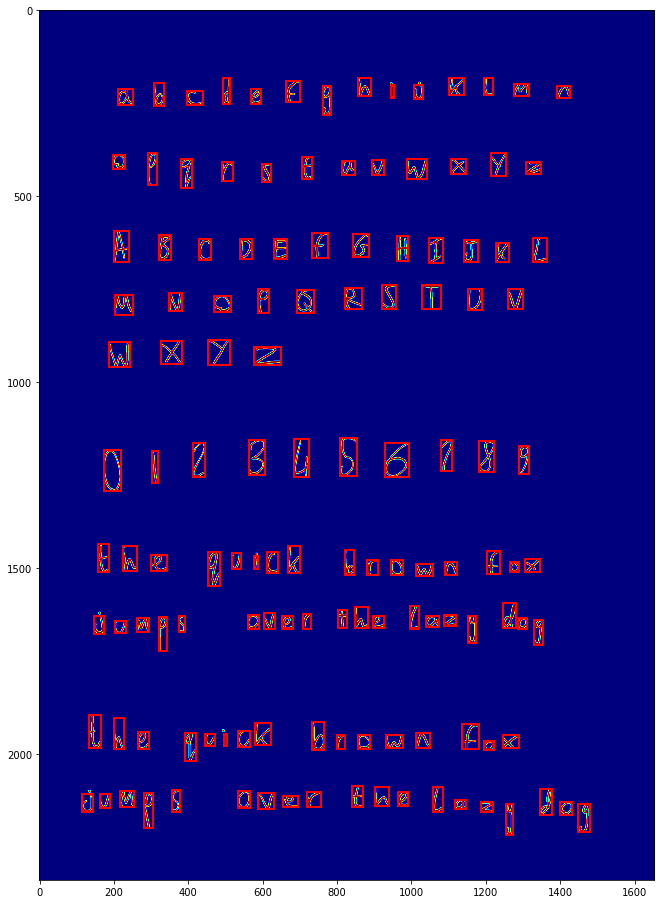

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.misc import imread,imresize
from skimage.segmentation import clear_border
from skimage.morphology import label
from skimage.measure import regionprops

image = imread("/content/Handwriting documents/hand write 4-1.png",1)

#apply threshold in order to make the image binary
bw = image < 120

# remove artifacts connected to image border
cleared = bw.copy()
clear_border(cleared)

# label image regions
label_image = label(cleared,neighbors=8)
borders = np.logical_xor(bw, cleared)
label_image[borders] = -1

print (label_image.max())

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 16))
ax.imshow(bw, cmap='jet')

#total = 0
for region in regionprops(label_image):
    # skip small images
    minr, minc, maxr, maxc = region.bbox
    #if region.area > 50:
    if maxr - minr > len(bw) / 250:#new CONDITION
        # draw rectangle around segmented coins
        
        #print(type(maxr))
        #add 1/4th the height to the height to include dots on letters
        #minr-=(maxr - minr)*0.20

        # maxr+=(maxr - minr)*0.20

        # minc-=(maxc - minc)*0.20

        # maxc+=(maxc - minc)*0.20

        rect = mpatches.Rectangle((minc, minr), (maxc - minc), (maxr - minr), fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        #total+=1

# plt.show()
# print(total)
# print(total % 61)
# print(total % 61 == 0)

# NN - Setup Dataset (Emnist):

In [5]:
from emnist import extract_training_samples
import numpy as np

images_digits, labels_digits = extract_training_samples('digits')#gets the digits data + labels
images_letters, labels_letters = extract_training_samples('letters')#gets the letters data + labels

images_digits = np.copy(images_digits)#copy to make them writeable
labels_digits = np.copy(labels_digits)

images_letters = np.copy(images_letters)
labels_letters = np.copy(labels_letters)


print(images_digits.shape)
print(labels_digits.shape)

print(images_letters.shape)
print(labels_letters.shape)
      
print(type(images_digits))

(240000, 28, 28)
(240000,)
(124800, 28, 28)
(124800,)
<class 'numpy.ndarray'>


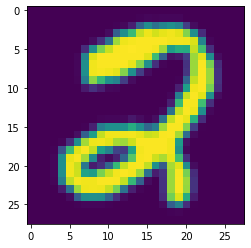

In [106]:
#-----------------------------------show an image
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
plt.imshow(images_digits[1330], interpolation='nearest')
plt.show()
#-----------------------------------

In [6]:
#show what the labels look like for each set
minval_digets = 0
for ele in labels_digits:
  minval_digets = min(ele, minval_digets)
print("min val digets:",minval_digets)#0

maxval_digets = 0
for ele in labels_digits:
  maxval_digets = max(ele, maxval_digets)
print("max val digets:",maxval_digets)#0-9


minval_letters = 0
for ele in labels_letters:
  minval_letters = min(ele, minval_letters)
print("min val letters:",minval_letters)#0

maxval_letters = 0
for ele in labels_letters:
  maxval_letters = max(ele, maxval_letters)
print("max val letters:",maxval_letters)#0-26

min val digets: 0
max val digets: 9
min val letters: 0
max val letters: 26


In [7]:
#unify digit and letters data

#cut out some number data: (so around equal amounts of data for each class)
images_digits = images_digits[:62400]#can comment this out to see the differance
labels_digits = labels_digits[:62400]

union_data = np.concatenate((images_digits, images_letters), axis=0, out=None)

#before union lables, correct to have label vals being greater than the max letter ones]

labels_digits+=maxval_letters+1

union_labels = np.concatenate((labels_digits, labels_letters), axis=0, out=None)

union_labels-=1

print(union_data.shape)
print(union_labels.shape)

(364800, 28, 28)
(364800,)


In [8]:
#could shuffle before split but it looks fairly random

#split data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(union_data, union_labels, random_state=0, test_size=0.20)

# Neural net:

In [9]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

n_inputs = 28*28 
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 26+9+1#the number of classes


X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0

y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)


#------------------------------- shuffle data and labels before split

indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)

X_train = X_train[indices]
y_train = y_train[indices]

#-------------------------------

X_valid, X_train = X_train[:5000], X_train[5000:]#take some validation data
y_valid, y_train = y_train[:5000], y_train[5000:]

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)#SGD
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 80
batch_size = 100

TensorFlow 1.x selected.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [10]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print("Epoch:", epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./NN_model.ckpt")

Epoch: 0 Batch accuracy: 0.72 Validation accuracy: 0.7476
Epoch: 1 Batch accuracy: 0.79 Validation accuracy: 0.7836
Epoch: 2 Batch accuracy: 0.83 Validation accuracy: 0.8074
Epoch: 3 Batch accuracy: 0.85 Validation accuracy: 0.8264
Epoch: 4 Batch accuracy: 0.86 Validation accuracy: 0.8408
Epoch: 5 Batch accuracy: 0.83 Validation accuracy: 0.8506
Epoch: 6 Batch accuracy: 0.88 Validation accuracy: 0.86
Epoch: 7 Batch accuracy: 0.9 Validation accuracy: 0.8624
Epoch: 8 Batch accuracy: 0.89 Validation accuracy: 0.8702
Epoch: 9 Batch accuracy: 0.88 Validation accuracy: 0.8694
Epoch: 10 Batch accuracy: 0.91 Validation accuracy: 0.8726
Epoch: 11 Batch accuracy: 0.89 Validation accuracy: 0.8776
Epoch: 12 Batch accuracy: 0.87 Validation accuracy: 0.877
Epoch: 13 Batch accuracy: 0.93 Validation accuracy: 0.8838
Epoch: 14 Batch accuracy: 0.88 Validation accuracy: 0.885
Epoch: 15 Batch accuracy: 0.87 Validation accuracy: 0.8842
Epoch: 16 Batch accuracy: 0.89 Validation accuracy: 0.8904
Epoch: 17 Ba

# NN - Analysis:

In [11]:
with tf.Session() as sess:
    saver.restore(sess, "./NN_model.ckpt") # or better, use save_path
    #------------shuffle before split - to get a better look at the results
    indices = np.arange(X_test.shape[0])
    np.random.shuffle(indices)

    X_test = X_test[indices]
    y_test = y_test[indices]
    #---------------------------------
    X_new_scaled = X_test
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)
    
print("Predicted classes:", y_pred[:20])
print("Actual classes:   ", y_test[:20])

from sklearn import metrics
print("Neural net accuracy Score with test data (emnist): ")
metrics.accuracy_score(y_test, y_pred, normalize=True)
#uses model to predict for test data and the calcs accuracy

INFO:tensorflow:Restoring parameters from ./NN_model.ckpt
Predicted classes: [10 21  0 24 27 28  7 20 26 22 26 15 18 22 19 33 10 27 22 31]
Actual classes:    [10 21  0 24 27 28  7 20 14 22 26 15 18 22 19 33 10 11 22 31]
Neural net accuracy Score with test data (emnist): 


0.9067708333333333

INFO:tensorflow:Restoring parameters from ./NN_model.ckpt
[[ 784    7    2    9    4    1    8   16    1    0    0    0    3    6    3    2   21    3    0    1    4    0    6    0    0    1   11    0   26    3   11    1    0    0    0   14]
 [   5  780    1    4    1    0    1   15    0    2    1    3    1    1    0    1    4    0    0    0    0    0    1    1    1    4   11    0    3    5    0    4   63    0   34    1]
 [   2    0  901    0   22    1    0    1    1    0    0    9    0    0    2    1    1    4    5    0    0    0    0    0    0    0    7    1    0    0    1    5    9    0    0    0]
 [   2    6    0  855    0    0    1    4    0   10    0    1    1    1    5    5    2    0    0    1    1    1    2    0    3    0   47    1   15    1    6    1    0    1    1    0]
 [   2    1   26    0  901    4    4    0    1    1    1    1    0    0    1    3    2    5    0    1    1    0    0    1    0    3    1    0    5    0    1    8    1    0    3    1]
 [   2    0    0    1    2 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


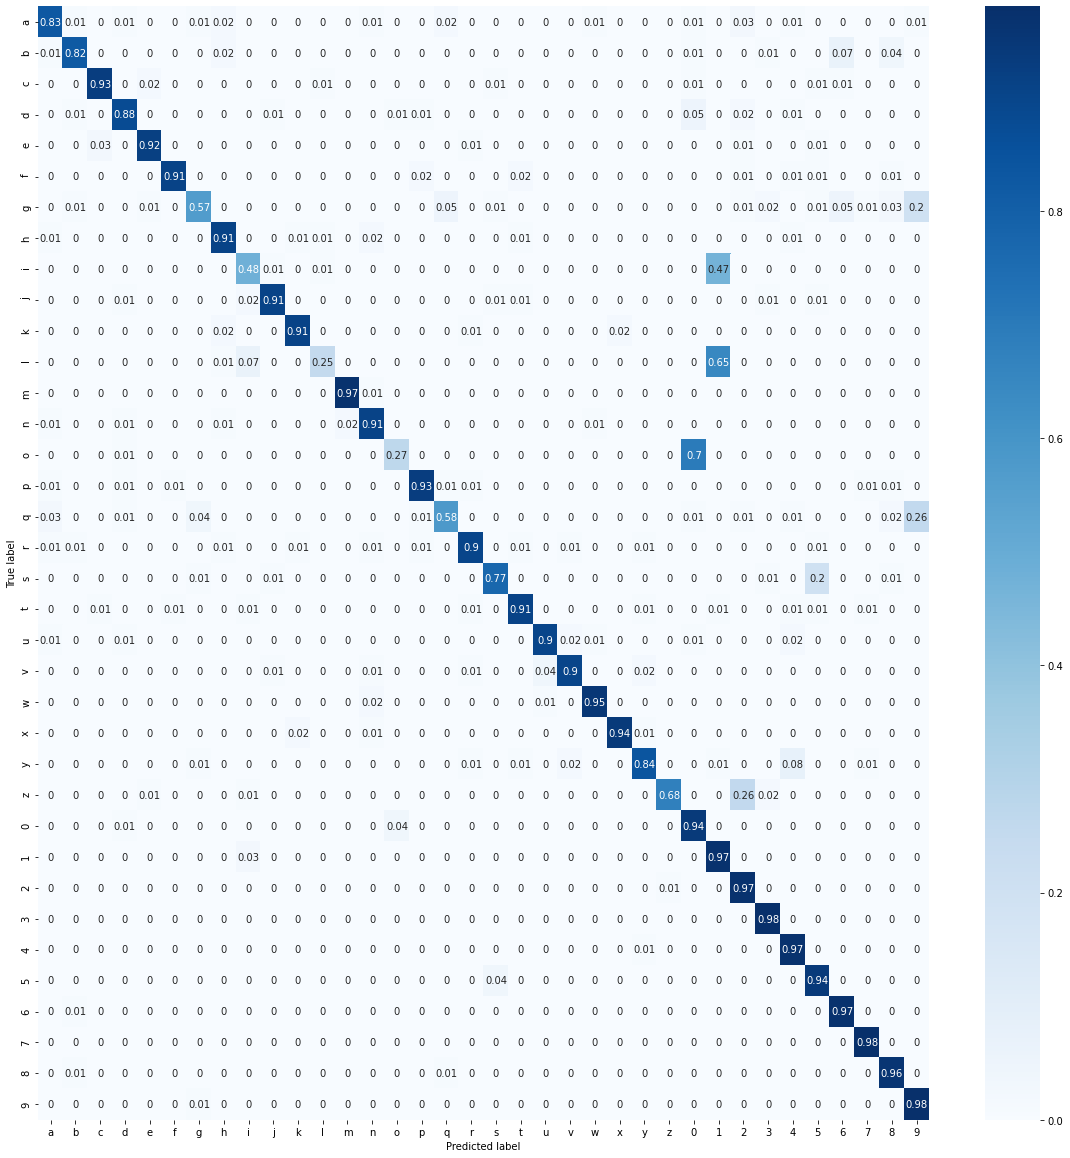

In [12]:
import sys
import numpy
#for the numpy array output version
numpy.set_printoptions(threshold=sys.maxsize)#to display all rows
numpy.set_printoptions(linewidth =sys.maxsize)#makes it so it the rows dont wrap around

with tf.Session() as sess:
    saver.restore(sess, "./NN_model.ckpt")
    confusion = tf.confusion_matrix(labels=y_test, predictions=y_pred, num_classes=26+9+1+1)#for its own data (split from the training dataset)
    numpy_con_mat = confusion.eval(session=sess)
    print(numpy_con_mat[:36,:36])#gets rid of the last redundant column and row

#print(numpy_con_mat)
numpy_con_mat = numpy_con_mat[:36,:36]
con_mat_norm = np.around(numpy_con_mat.astype('float') / numpy_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)#get relative frequency for prediction labels


#new tick lables
labels_correct = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
import pandas as pd
con_mat_df = pd.DataFrame(con_mat_norm, index = labels_correct, columns = labels_correct)
#above line does equivelent to the below lines:
# #0.5 so the new labels are in the middle of each box
# loc = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5 ,20.5, 21.5, 22.5,23.5,24.5,25.5,26.5,27.5,28.5,29.5,30.5,31.5,32.5,33.5,34.5,35.5,36.5]
# plt.xticks(loc, labels = labels_correct_x, rotation='vertical')
# plt.yticks(loc, labels = labels_correct, rotation='vertical')
# axes = plt.axes()#to get rid of the extra chart area
# axes.set_ylim([0, 36])
# axes.set_xlim([0, 36])

from matplotlib import pyplot as plt
import seaborn as sns


figure = plt.figure(figsize=(16, 16))

sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

# NN - Extract letters from page and run through model:

New document letter recognition with neural net:

In [13]:
#create int class to string:
label_tuples = []

string = 'abcdefghijklmnopqrstuvwxyz0123456789'#classes in order
split_list = [char for char in string]

print(split_list)

value = 0
for character in split_list:
  label_tuples.append((character, value))
  value+=1

print(label_tuples)

def find_label_string(int_label, label_tuples):
  for ele in label_tuples:
    if(ele[1]== int_label):
      return ele[0]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
[('a', 0), ('b', 1), ('c', 2), ('d', 3), ('e', 4), ('f', 5), ('g', 6), ('h', 7), ('i', 8), ('j', 9), ('k', 10), ('l', 11), ('m', 12), ('n', 13), ('o', 14), ('p', 15), ('q', 16), ('r', 17), ('s', 18), ('t', 19), ('u', 20), ('v', 21), ('w', 22), ('x', 23), ('y', 24), ('z', 25), ('0', 26), ('1', 27), ('2', 28), ('3', 29), ('4', 30), ('5', 31), ('6', 32), ('7', 33), ('8', 34), ('9', 35)]


Extracting characters...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


/content/Handwriting documents/hand write 4-1.png


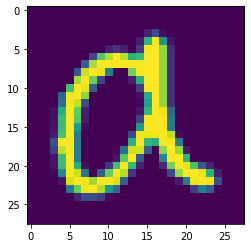

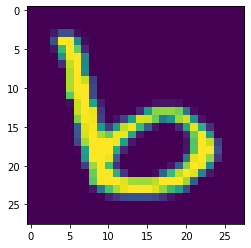

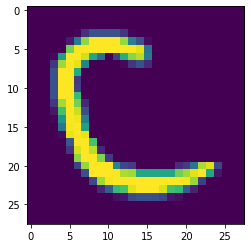

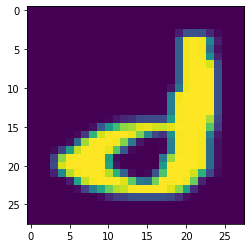

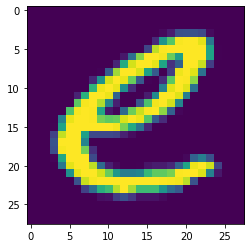

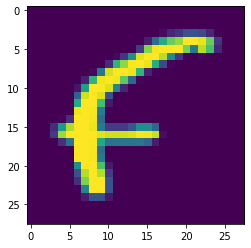

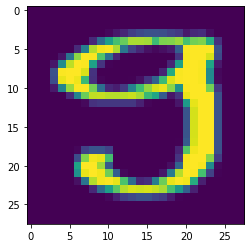

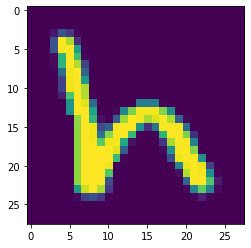

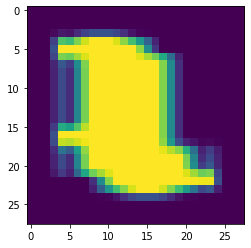

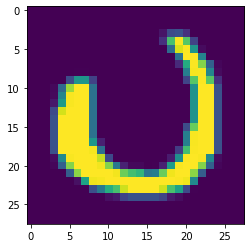

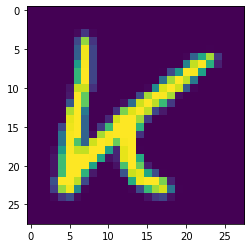

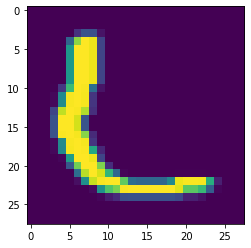

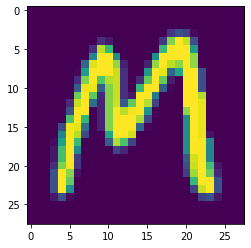

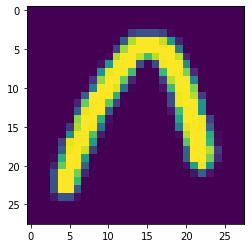

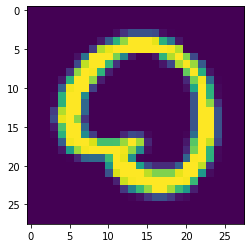

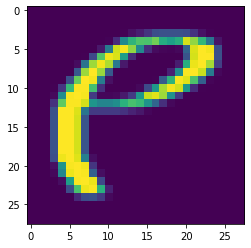

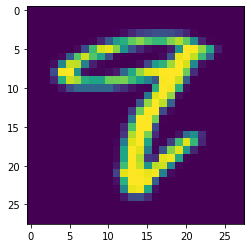

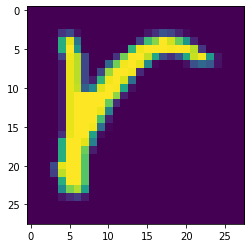

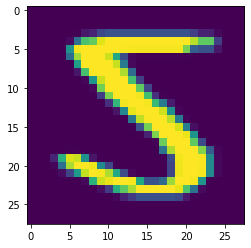

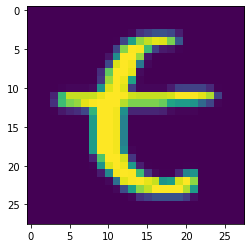

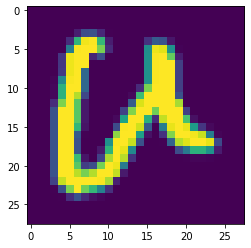

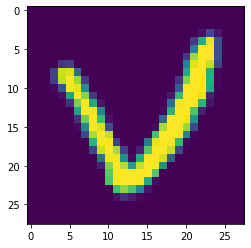

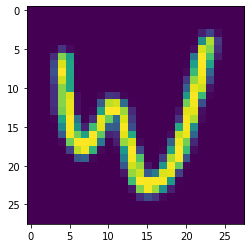

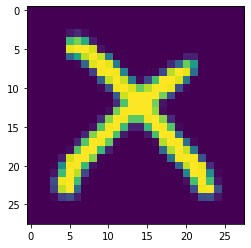

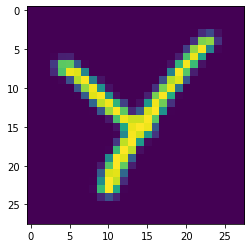

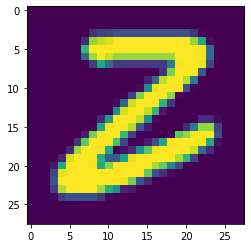

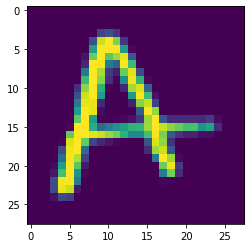

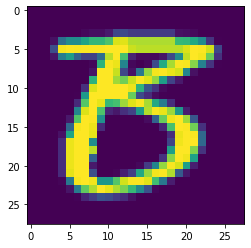

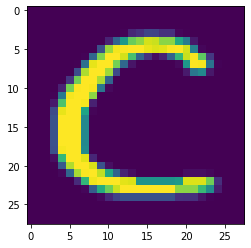

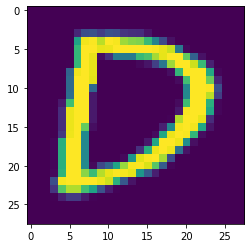

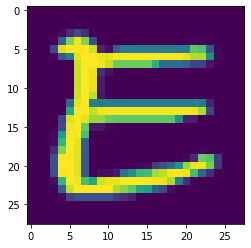

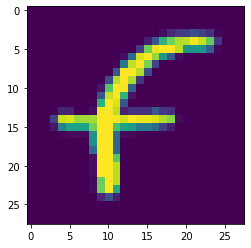

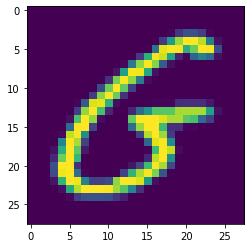

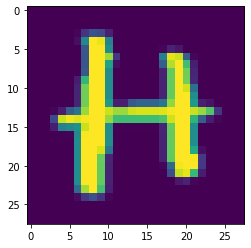

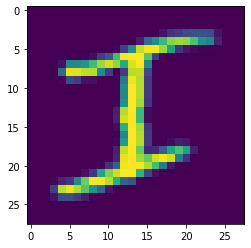

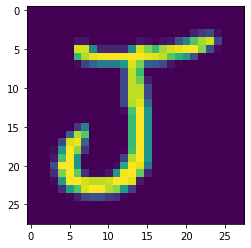

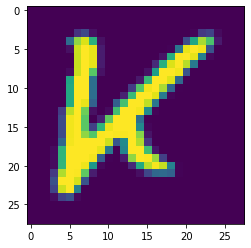

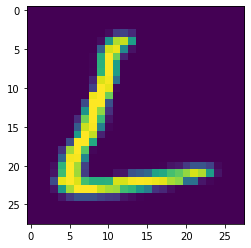

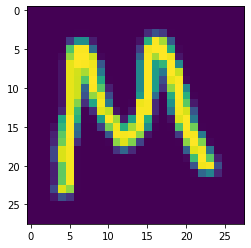

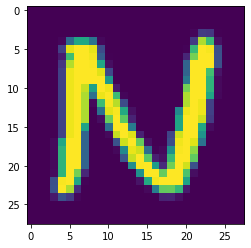

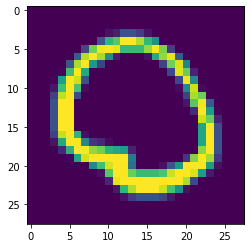

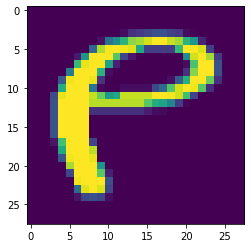

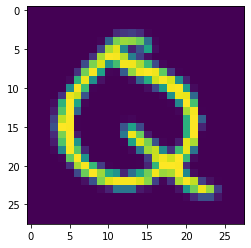

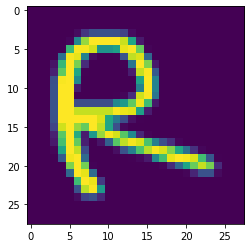

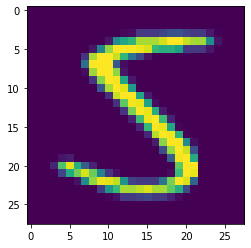

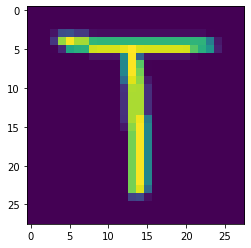

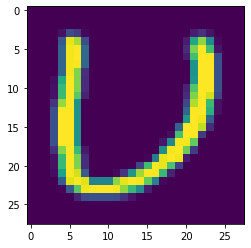

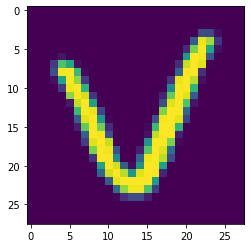

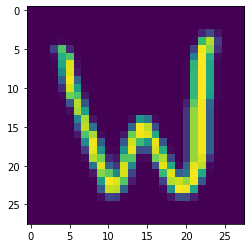

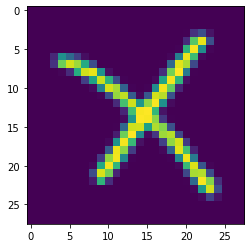

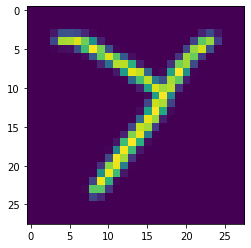

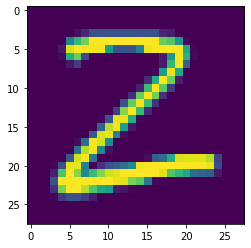

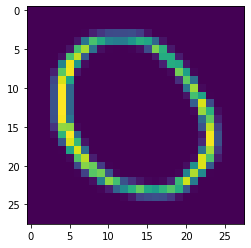

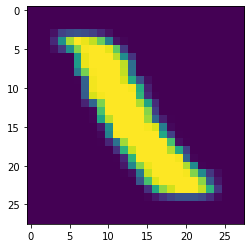

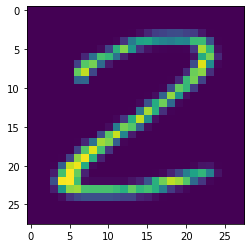

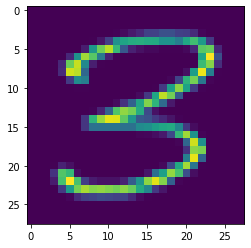

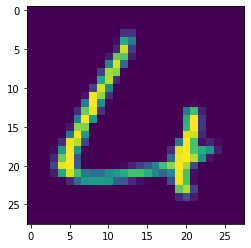

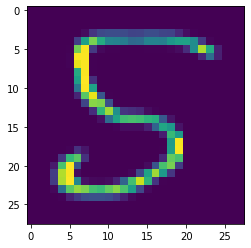

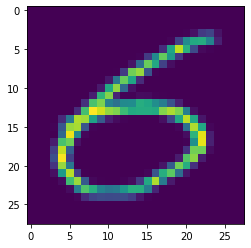

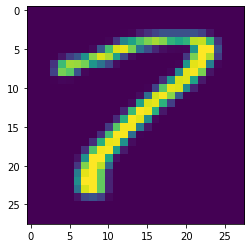

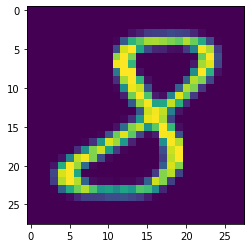

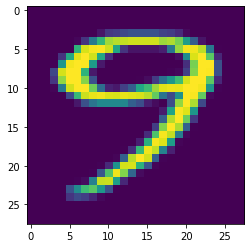

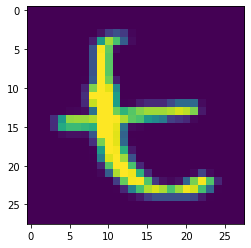

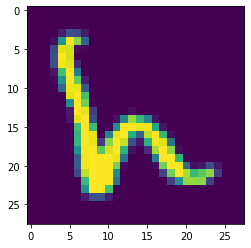

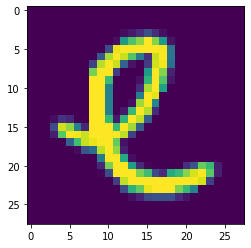

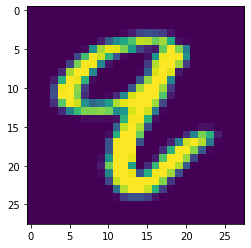

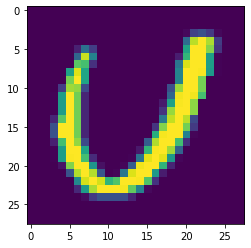

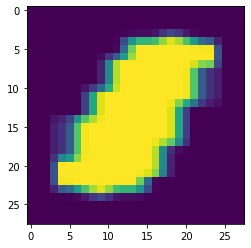

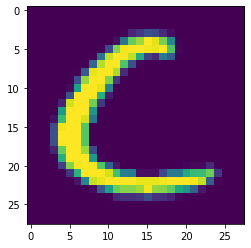

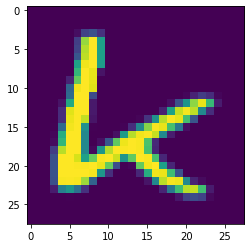

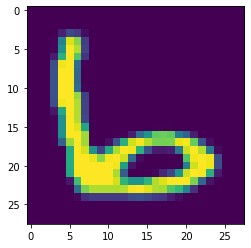

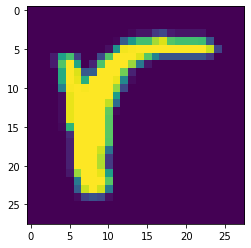

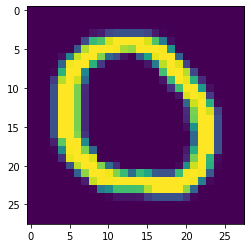

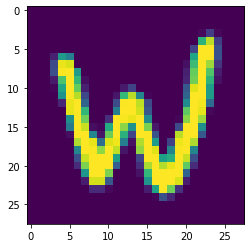

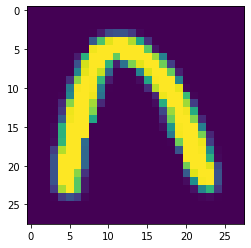

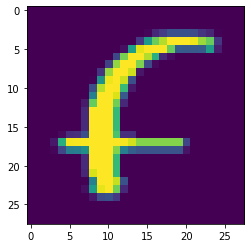

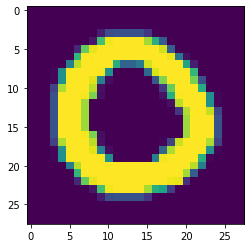

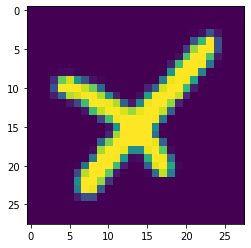

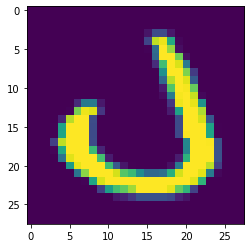

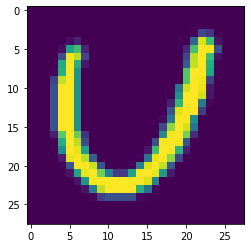

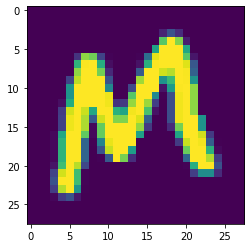

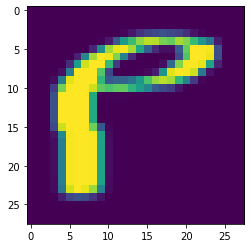

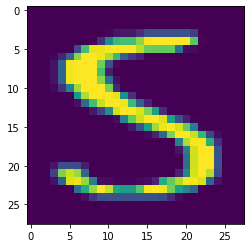

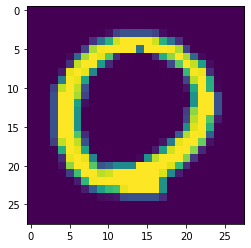

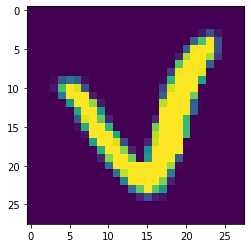

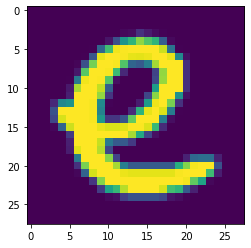

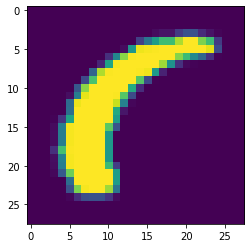

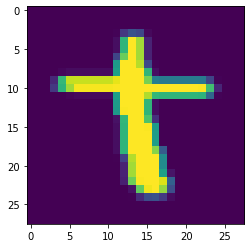

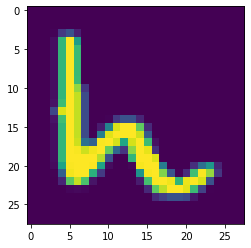

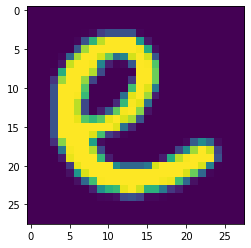

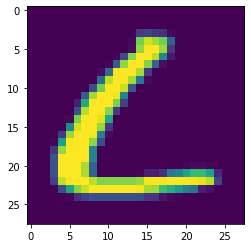

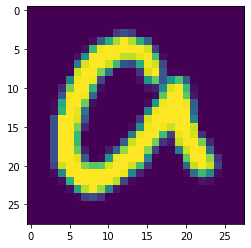

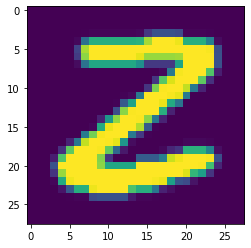

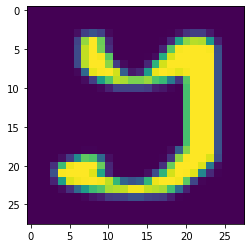

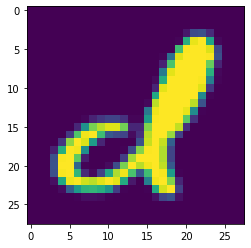

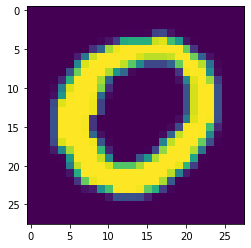

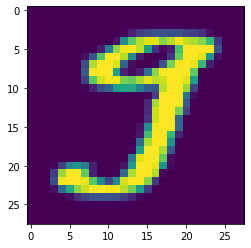

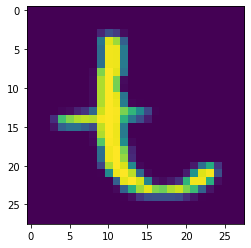

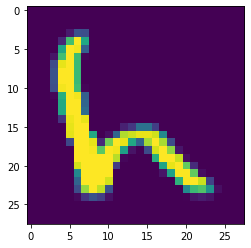

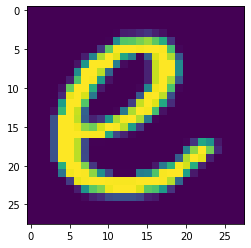

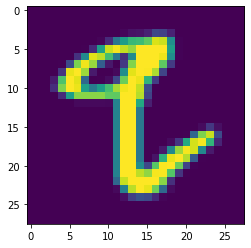

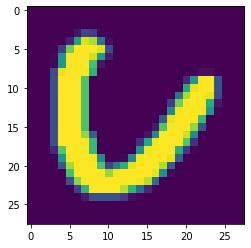

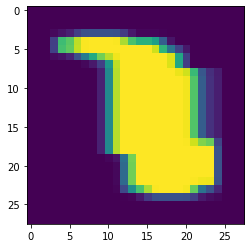

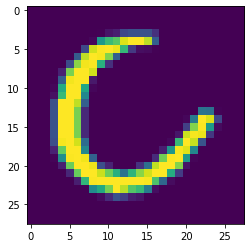

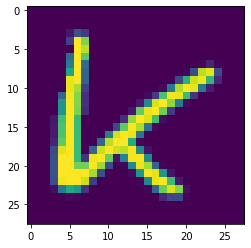

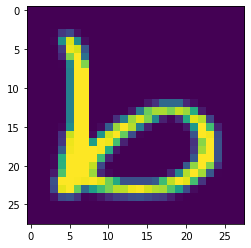

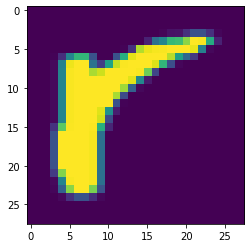

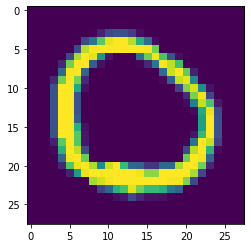

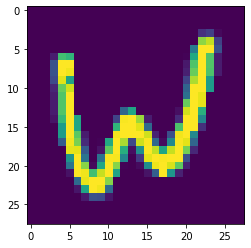

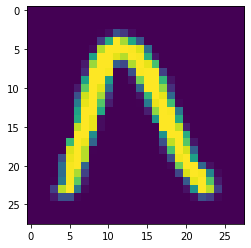

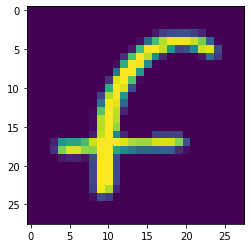

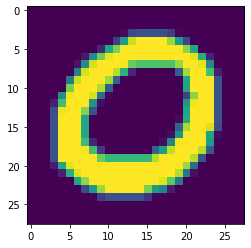

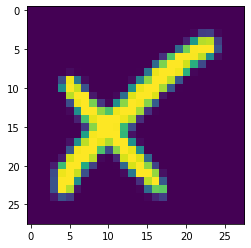

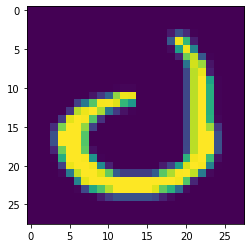

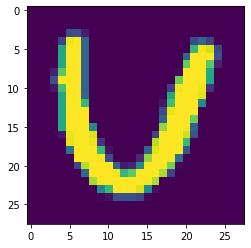

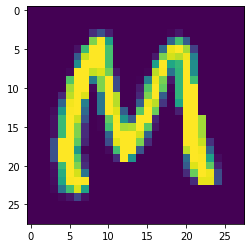

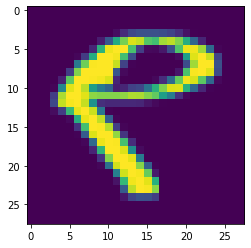

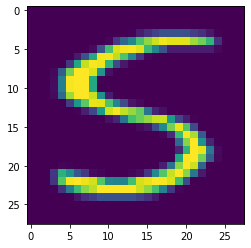

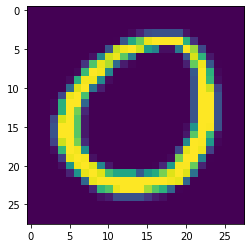

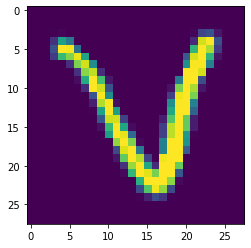

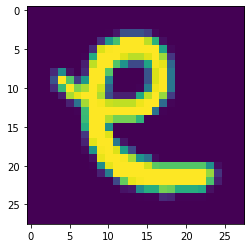

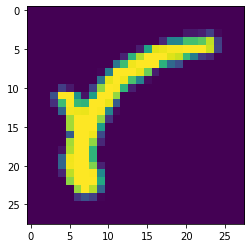

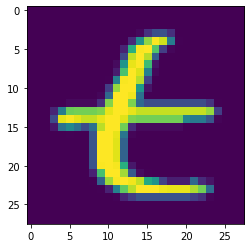

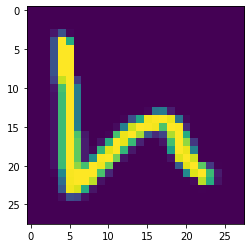

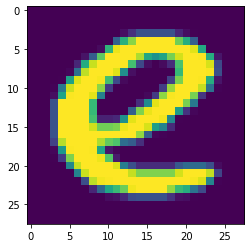

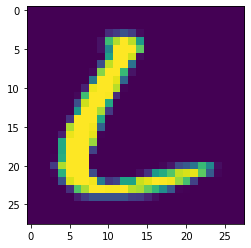

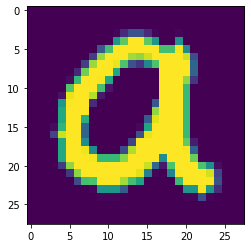

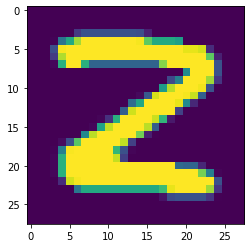

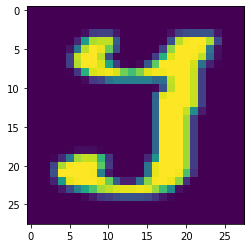

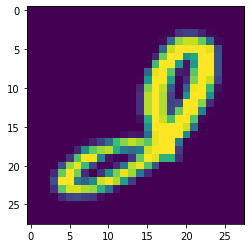

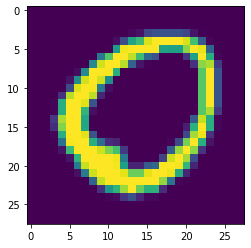

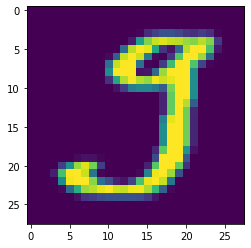

(132, 28, 28)
(132, 784)


In [14]:
#have each letter classifed and its classification added to a list then printed out, then have this list split appart for each word.
# Extract letters from page
import cv2
import time
start_time = time.time()
extract = Extract_Letters()

letters_in_doc_NN = []

letters = extract.extractFile("/content/Handwriting documents/hand write 4-1.png", "defualt")#add default mode

for letter in letters:#for each letter in the file
  letter = cv2.copyMakeBorder( letter, 5, 5, 5, 5, cv2.BORDER_CONSTANT)#add boarder so it looks like training data (5 on each side)
  #resize
  letter = resize(letter, (28, 28))#resize back
  letters_in_doc_NN.append(letter)
  #-----------------------------------show the image
  # from PIL import Image
  # import numpy as np
  # from matplotlib import pyplot as plt
  # plt.imshow(letter, interpolation='nearest')
  # plt.show()
  #-----------------------------------
  
letters_in_doc_NN= np.array(letters_in_doc_NN , dtype=np.float32)#converts to numpy array
print(letters_in_doc_NN.shape)


letters_in_doc_NN = letters_in_doc_NN.astype(np.float32).reshape(-1, 28*28) #/ 255.0 #remove this to fix classification
print(letters_in_doc_NN.shape)

In [15]:
#to classfy an array of images
import tensorflow as tf

with tf.Session() as sess:
    saver.restore(sess, "./NN_model.ckpt") # or better, use save_path
    X_new_scaled =  letters_in_doc_NN#feed img array
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

print("Predicted classes:", y_pred)

INFO:tensorflow:Restoring parameters from ./NN_model.ckpt
Predicted classes: [ 0 32  2  3  4  5  6  7  0 20 10 10 12 13 26 17 34 17 31 19  7 21 21 23 24 25  0 34  2  3  4  5  6  7  8  9 10 11 12 13 26  4 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 19  7  4 16 20 26  2 10 32 17 26 22 13  5 26 23  9 20 12 17 18 26 21  4 17 19  7  4 11  0 28  9  3 26  6 19  7  4 19 20  1  2 10  1 17 26 22 13  5 26 23  3 21 12  4 31 26 21  4 17 19  7  4 11  0 25  9 28 26  6]


In [16]:
alphabet = "abcdefghijklmnopqrstuvwxyz"
numbers = "0123456789"
quick_brown_fox = "thequickbrownfoxjumpsoverthelazydog"
real_string = alphabet + alphabet + numbers + quick_brown_fox + quick_brown_fox

real_list = list(real_string)#split into a list

print(real_list)
print(y_pred)

predicted_list = y_pred
predicted_list = [find_label_string(ele, label_tuples) for ele in predicted_list] #replace the int value with real string for the class

from sklearn import metrics
print("Neural net accuracy Score with test data (my handwriting): ")
metrics.accuracy_score(real_list, predicted_list, normalize=True)#get accuracy score for this testing data

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 't', 'h', 'e', 'q', 'u', 'i', 'c', 'k', 'b', 'r', 'o', 'w', 'n', 'f', 'o', 'x', 'j', 'u', 'm', 'p', 's', 'o', 'v', 'e', 'r', 't', 'h', 'e', 'l', 'a', 'z', 'y', 'd', 'o', 'g', 't', 'h', 'e', 'q', 'u', 'i', 'c', 'k', 'b', 'r', 'o', 'w', 'n', 'f', 'o', 'x', 'j', 'u', 'm', 'p', 's', 'o', 'v', 'e', 'r', 't', 'h', 'e', 'l', 'a', 'z', 'y', 'd', 'o', 'g']
[ 0 32  2  3  4  5  6  7  0 20 10 10 12 13 26 17 34 17 31 19  7 21 21 23 24 25  0 34  2  3  4  5  6  7  8  9 10 11 12 13 26  4 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 19  7  4 16 20 26  2 10 32 17 26 22 13  5 26 23  9 20 12 17 18 26 21  4 17 19  7  4 11  0 28  9  3 26  6 19  7  4 19 20  1  2 10  1 17 26 22 13  5 26 23

0.7424242424242424

In [17]:
doc_NN = ""

letters = 1

alphabet = 26
numbers = 10
lazy_dog = 35

for ele in y_pred:#num should be the same
  #split for nicer output of known test data lengths
  if(letters == alphabet+1 or letters == (alphabet*2)+1 or letters == (alphabet*2)+1+numbers or letters == (alphabet*2)+1+numbers+ lazy_dog):#letters (lower+uppercase), then numbers, then sets of the quick brown fox
    doc_NN+="\n"
  doc_NN+=(find_label_string(ele, label_tuples))#gets just the predicted character and adds to the string
  letters += 1

print("Neural net page interpretation: ")
print(doc_NN)

Neural net page interpretation: 
a6cdefghaukkmn0r8r5thvvxyz
a8cdefghijklmn0eqrstuvwxyz
0123456789
thequ0ck6r0wnf0xjumrs0verthela2jd0g
thetubckbr0wnf0xdvme50verthelazj20g


# CNN:

# CNN - data

In [79]:
%tensorflow_version 1.x

In [80]:
import tensorflow as tf

In [81]:
from emnist import extract_training_samples
import numpy as np

images_digits, labels_digits = extract_training_samples('digits')
images_letters, labels_letters = extract_training_samples('letters')

images_digits = np.copy(images_digits)#copy to make them writeable
labels_digits = np.copy(labels_digits)

images_letters = np.copy(images_letters)
labels_letters = np.copy(labels_letters)


print(images_digits.shape)
print(labels_digits.shape)

print(images_letters.shape)
print(labels_letters.shape)
      
print(type(images_digits))

(240000, 28, 28)
(240000,)
(124800, 28, 28)
(124800,)
<class 'numpy.ndarray'>


In [82]:
minval_digets = 0
for ele in labels_digits:
  minval_digets = min(ele, minval_digets)
print("min val digets:",minval_digets)#0

maxval_digets = 0
for ele in labels_digits:
  maxval_digets = max(ele, maxval_digets)
print("max val digets:",maxval_digets)#0-9


minval_letters = 0
for ele in labels_letters:
  minval_letters = min(ele, minval_letters)
print("min val letters:",minval_letters)#0

maxval_letters = 0
for ele in labels_letters:
  maxval_letters = max(ele, maxval_letters)
print("max val letters:",maxval_letters)#0-26

min val digets: 0
max val digets: 9
min val letters: 0
max val letters: 26


In [83]:
#unify digit and letters data

#cut out some number data: (so around equal amounts of data for each class)
images_digits = images_digits[:62400]
labels_digits = labels_digits[:62400]

union_data = np.concatenate((images_digits, images_letters), axis=0, out=None)

#before union lables, correct to have label vals being greater than the max letter ones]

labels_digits+=maxval_letters+1

union_labels = np.concatenate((labels_digits, labels_letters), axis=0, out=None)

union_labels-=1

print("Union data shape: " , union_data.shape)
print("Union labels shape: " ,union_labels.shape)

Union data shape:  (187200, 28, 28)
Union labels shape:  (187200,)


# CNN - Basic - definition and train

In [23]:
#could shuffle before split but it looks fairly random
#split data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(union_data, union_labels, random_state=0, test_size=0.20)
#------------------------------- shuffle data and labels before validation split
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)

X_train = X_train[indices]
y_train = y_train[indices]
#-------------------------------

In [24]:
n_epochs = 20
batch_size = 50

In [25]:
n_conv1 = 64
n_hidden1 = 512
n_outputs = 36

In [26]:

X_train = np.expand_dims(X_train,-1).astype(np.float32) / 255.0
X_test = np.expand_dims(X_test,-1).astype(np.float32) / 255.0

y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [27]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, 28, 28, 1), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [28]:
with tf.name_scope("dnn"):
    conv1 = tf.layers.conv2d(X, 
                             n_conv1, 
                             kernel_size = (7,7), 
                             strides=(3,3), 
                             name="conv1", 
                             activation=tf.nn.relu)
    
    pool1 = tf.layers.max_pooling2d(conv1, 
                                    pool_size=(4,4), 
                                    strides=(4,4))
    
    flatten = tf.layers.flatten(pool1)

    fc1 = tf.layers.dense(flatten, 
                          n_hidden1, 
                          name="fc1",
                          activation=tf.nn.relu)
    
    logits = tf.layers.dense(fc1, 
                             n_outputs, 
                             name="outputs")

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.flatten instead.


In [29]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [30]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [31]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [32]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

# Train

In [33]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./CNN_basic.ckpt")

0 Batch accuracy: 0.74 Validation accuracy: 0.6708
1 Batch accuracy: 0.74 Validation accuracy: 0.7566
2 Batch accuracy: 0.86 Validation accuracy: 0.7822
3 Batch accuracy: 0.8 Validation accuracy: 0.801
4 Batch accuracy: 0.78 Validation accuracy: 0.8114
5 Batch accuracy: 0.78 Validation accuracy: 0.822
6 Batch accuracy: 0.9 Validation accuracy: 0.8376
7 Batch accuracy: 0.9 Validation accuracy: 0.8396
8 Batch accuracy: 0.86 Validation accuracy: 0.8412
9 Batch accuracy: 0.88 Validation accuracy: 0.8468
10 Batch accuracy: 0.88 Validation accuracy: 0.8448
11 Batch accuracy: 0.9 Validation accuracy: 0.8582
12 Batch accuracy: 0.86 Validation accuracy: 0.8558
13 Batch accuracy: 0.96 Validation accuracy: 0.8576
14 Batch accuracy: 0.92 Validation accuracy: 0.86
15 Batch accuracy: 0.94 Validation accuracy: 0.8684
16 Batch accuracy: 0.86 Validation accuracy: 0.8652
17 Batch accuracy: 0.9 Validation accuracy: 0.867
18 Batch accuracy: 0.84 Validation accuracy: 0.8646
19 Batch accuracy: 0.9 Validatio

# Accuracy on its own test data

In [34]:
with tf.Session() as sess:
    saver.restore(sess, "./CNN_basic.ckpt") # or better, use save_path
    #------------shuffle before split - to get a better look at the results
    indices = np.arange(X_test.shape[0])
    np.random.shuffle(indices)

    X_test = X_test[indices]
    y_test = y_test[indices]
    #---------------------------------
    X_new_scaled = X_test
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)
    
print("Predicted classes:", y_pred[:20])
print("Actual classes:   ", y_test[:20])

from sklearn import metrics
print("CNN accuracy Score with test data (emnist): ")
metrics.accuracy_score(y_test, y_pred, normalize=True)

INFO:tensorflow:Restoring parameters from ./CNN_basic.ckpt
Predicted classes: [32 32 21  1 18 15  4  8  9  1  1 28 35  5 15  2 33 11 26 35]
Actual classes:    [32 32 21  1 18 15  4  8  9  1  1 28 35 16 15  4 33 11 26  6]
CNN accuracy Score with test data (emnist): 


0.8670138888888889

INFO:tensorflow:Restoring parameters from ./CNN_basic.ckpt
[[ 877    0    2    6    2    4    6    7    0    0    0    0    2    1    4    2   24    7    0    1    2    0    2    1    0    1    3    0    9    1    4    1    0    0    1    3    0]
 [   4  855    0    5    2    1    4    6    0    0    2    0    0    0    3    3    3    1    2    0    0    0    1    0    0    2    3    1    0    2    0    2   59    0   17    0    0]
 [   4    0  907    1   16    3    3    0    0    0    0    2    0    0    3    1    1    4    0    0    2    0    0    0    0    0    1    0    0    0    0    2    3    0    0    0    0]
 [  11    6    0  888    0    0    1    0    0   21    0    1    0    0   16    8    2    0    0    0    0    0    1    0    0    0   23    0    5    0    0    0    0    1    0    0    0]
 [   4    0   20    0  908   10    3    0    0    0    2    1    0    0    3    3    1    6    0    0    2    0    0    0    0    2    0    0    1    0    0    1    1    0    2    0    0]
 

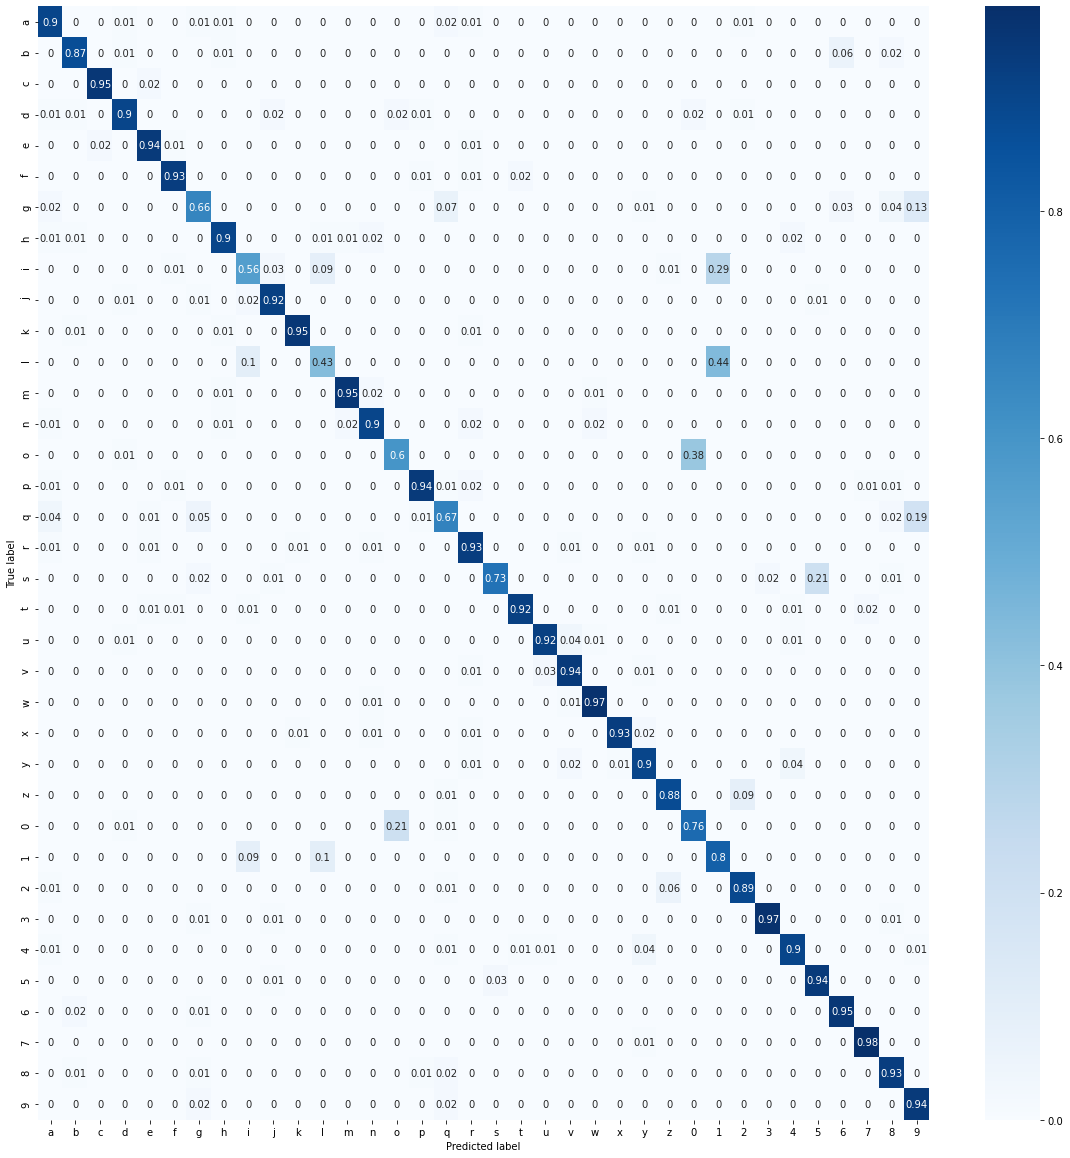

In [35]:
import sys
import numpy
#for the numpy array output version
numpy.set_printoptions(threshold=sys.maxsize)#to display all rows
numpy.set_printoptions(linewidth =sys.maxsize)#makes it so it the rows dont wrap around

with tf.Session() as sess:
    saver.restore(sess, "./CNN_basic.ckpt")
    confusion = tf.confusion_matrix(labels=y_test, predictions=y_pred, num_classes=26+9+1+1)#for its own data (split from the training dataset)
    numpy_con_mat = confusion.eval(session=sess)
    print(numpy_con_mat)

numpy_con_mat = numpy_con_mat[:36,:36]
con_mat_norm = np.around(numpy_con_mat.astype('float') / numpy_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)#get relative frequency for prediction labels

#new tick lables
labels_correct = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
import pandas as pd
con_mat_df = pd.DataFrame(con_mat_norm, index = labels_correct, columns = labels_correct)

from matplotlib import pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(16, 16))

sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

# CNN - Basic - Test against doc

In [36]:
#create int class to string:
label_tuples = []

string = 'abcdefghijklmnopqrstuvwxyz0123456789'#classes in order
split_list = [char for char in string]

print(split_list)

value = 0
for character in split_list:
  label_tuples.append((character, value))
  value+=1

print(label_tuples)

def find_label_string(int_label, label_tuples):
  for ele in label_tuples:
    if(ele[1]== int_label):
      return ele[0]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
[('a', 0), ('b', 1), ('c', 2), ('d', 3), ('e', 4), ('f', 5), ('g', 6), ('h', 7), ('i', 8), ('j', 9), ('k', 10), ('l', 11), ('m', 12), ('n', 13), ('o', 14), ('p', 15), ('q', 16), ('r', 17), ('s', 18), ('t', 19), ('u', 20), ('v', 21), ('w', 22), ('x', 23), ('y', 24), ('z', 25), ('0', 26), ('1', 27), ('2', 28), ('3', 29), ('4', 30), ('5', 31), ('6', 32), ('7', 33), ('8', 34), ('9', 35)]


Extracting characters...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


/content/Handwriting documents/hand write 4-1.png


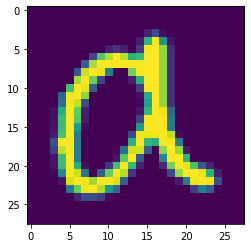

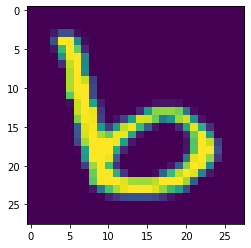

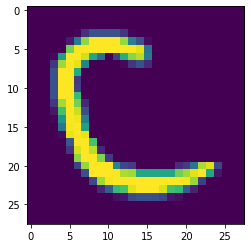

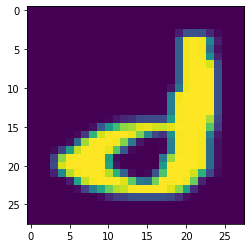

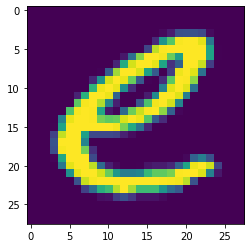

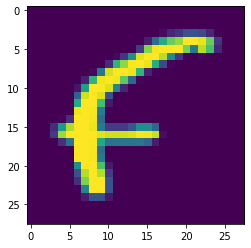

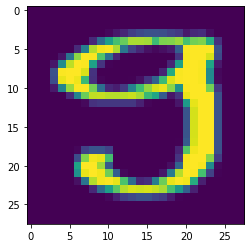

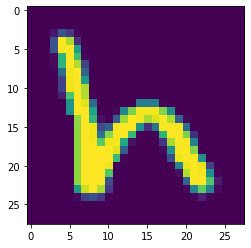

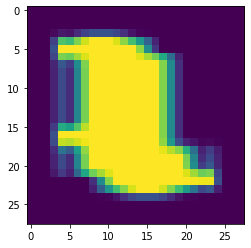

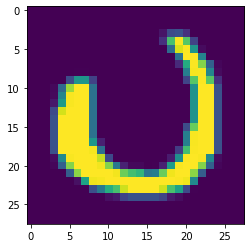

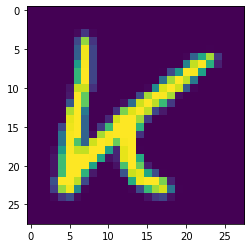

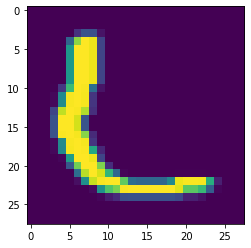

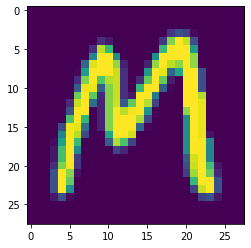

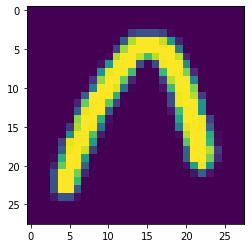

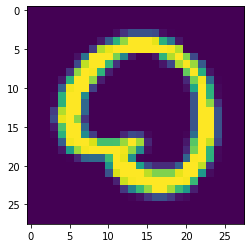

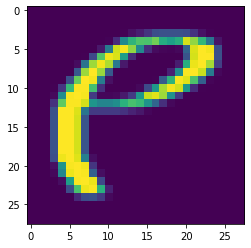

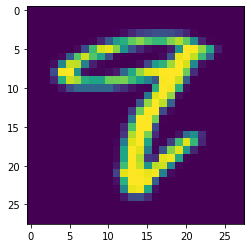

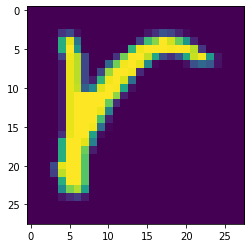

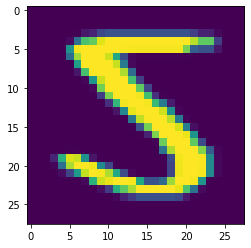

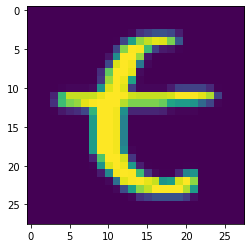

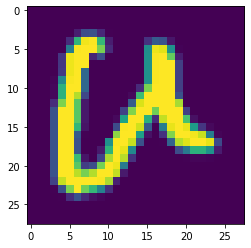

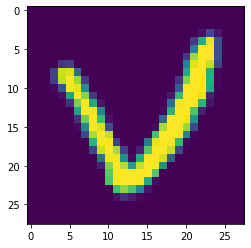

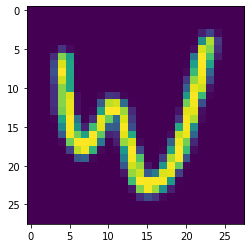

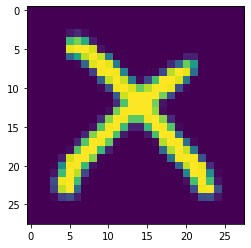

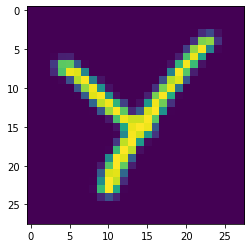

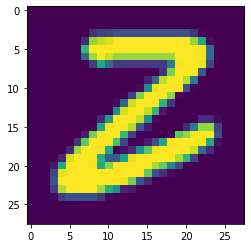

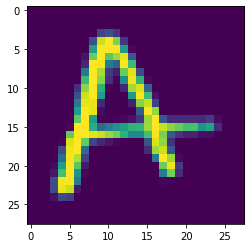

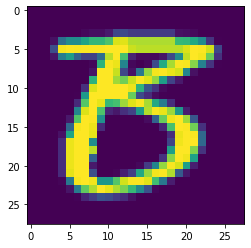

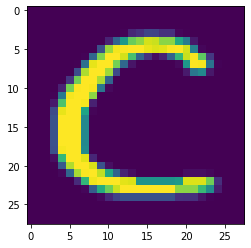

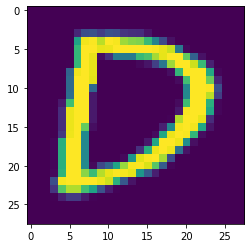

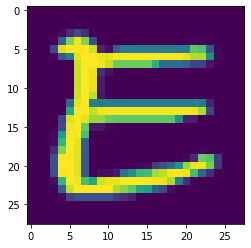

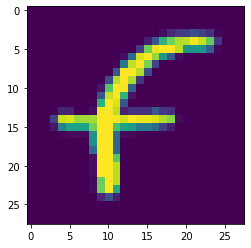

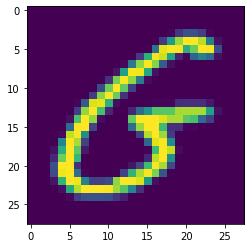

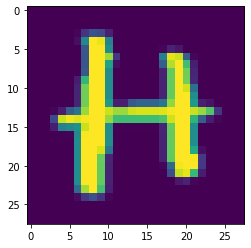

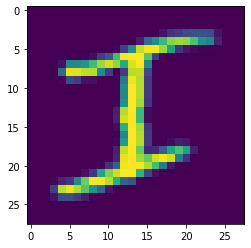

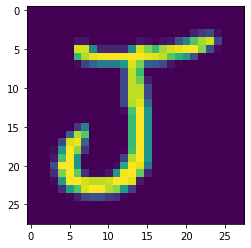

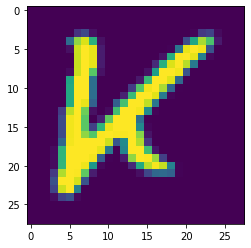

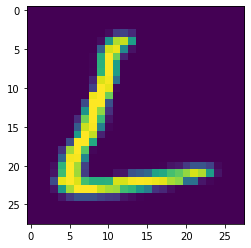

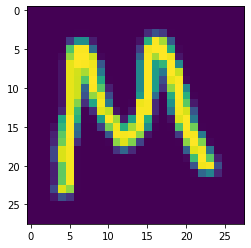

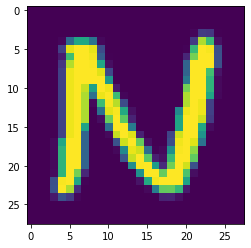

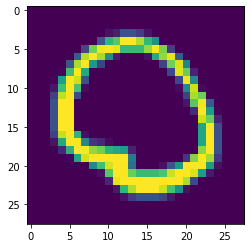

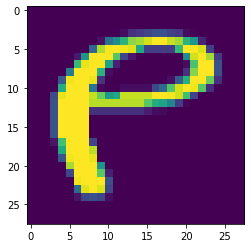

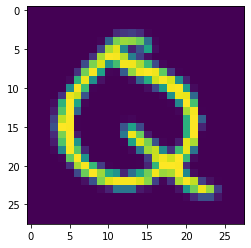

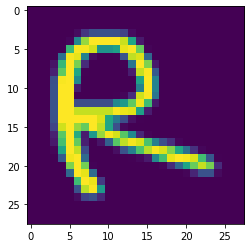

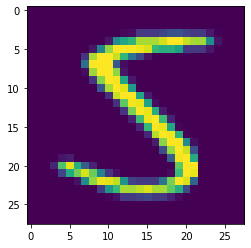

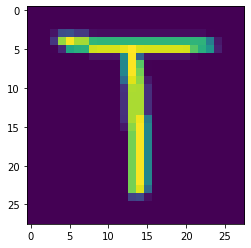

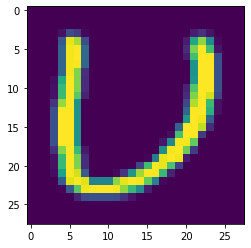

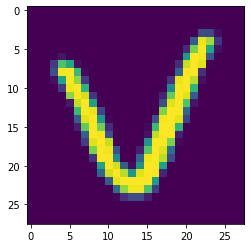

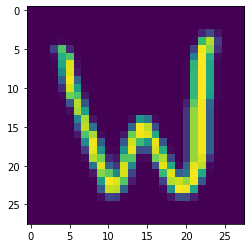

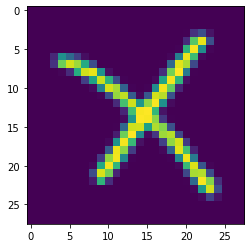

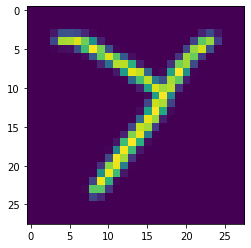

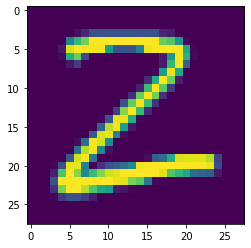

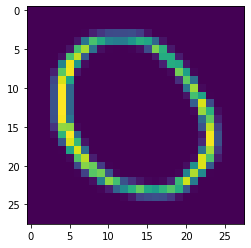

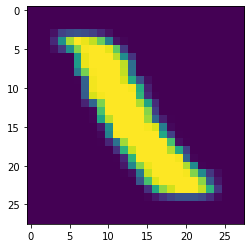

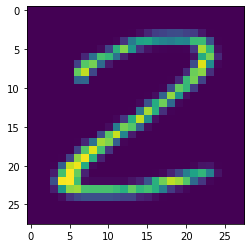

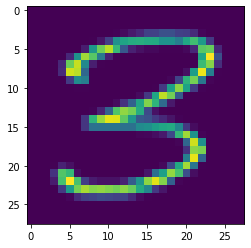

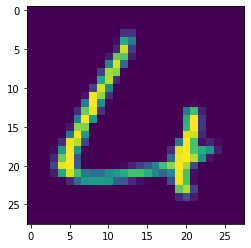

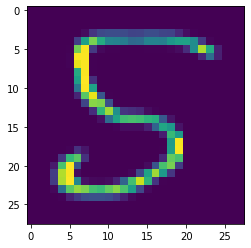

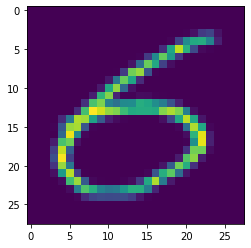

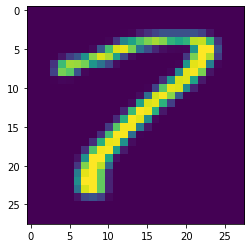

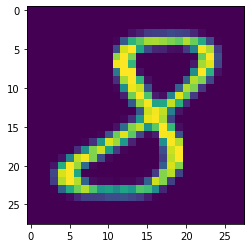

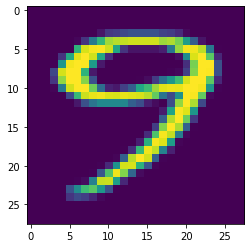

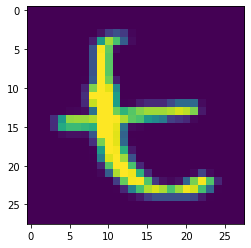

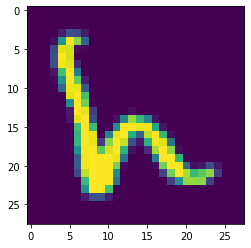

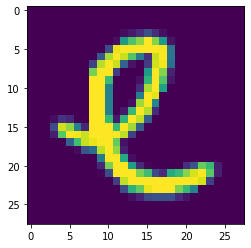

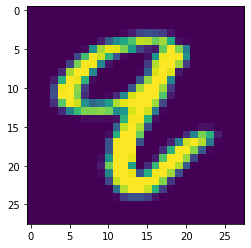

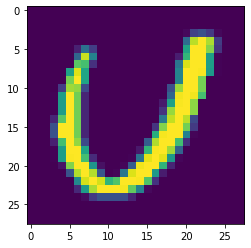

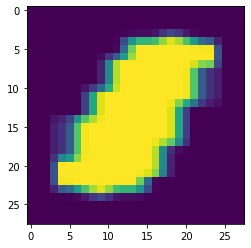

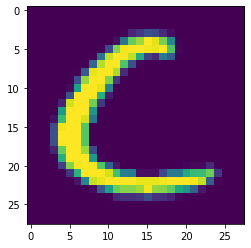

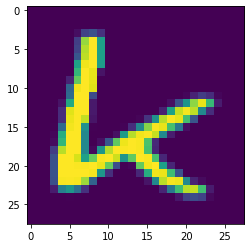

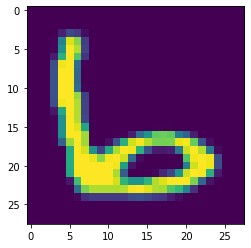

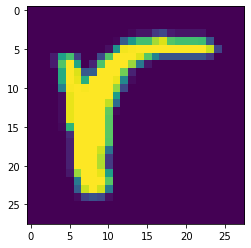

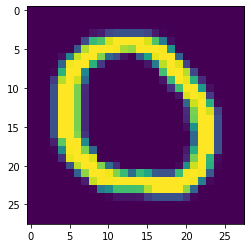

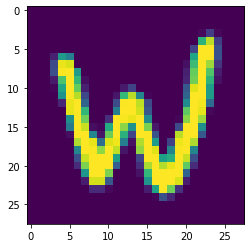

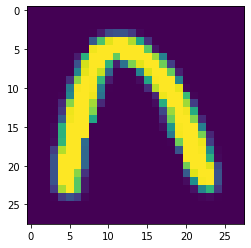

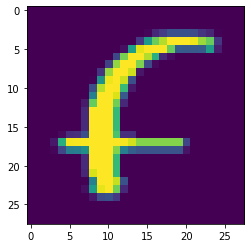

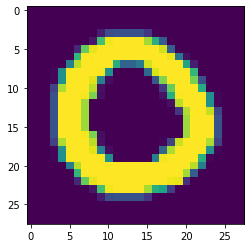

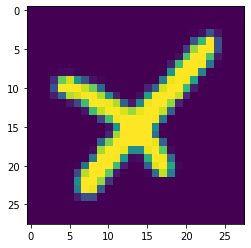

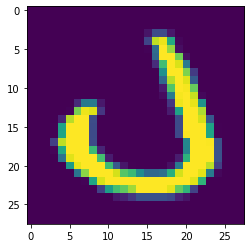

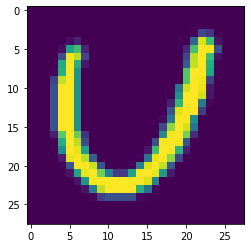

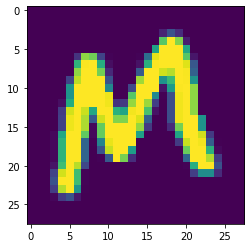

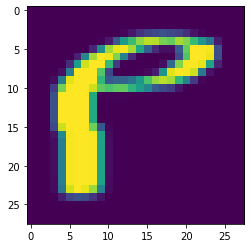

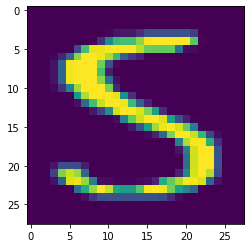

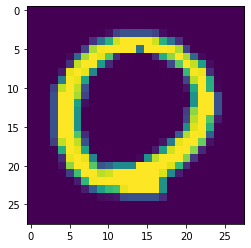

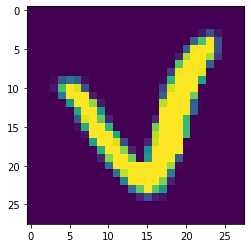

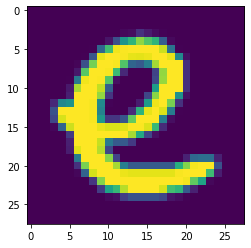

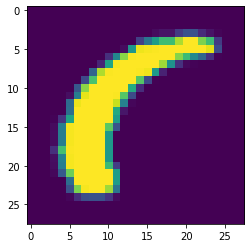

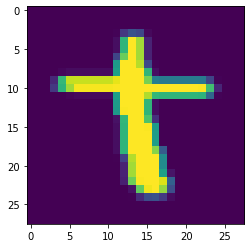

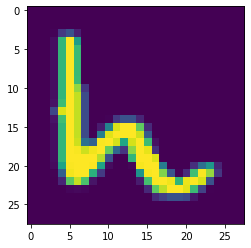

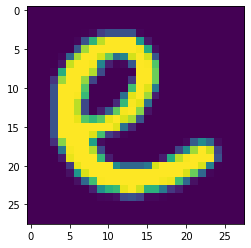

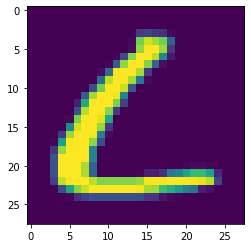

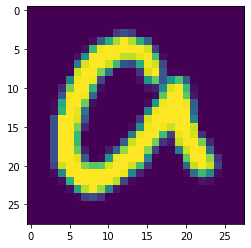

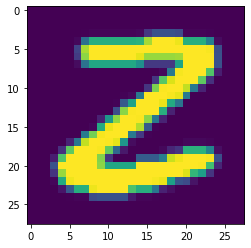

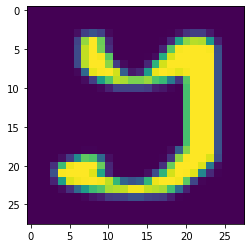

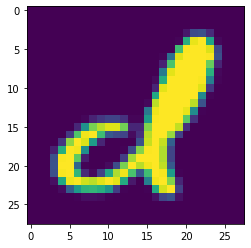

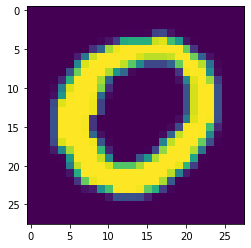

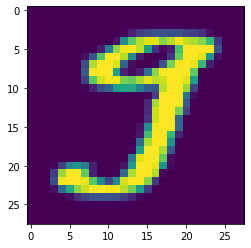

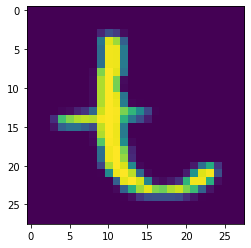

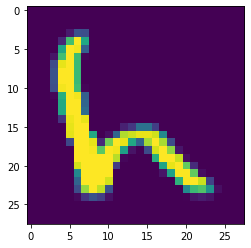

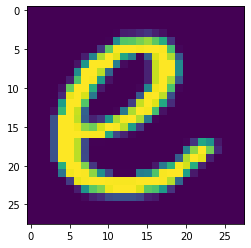

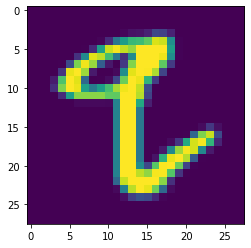

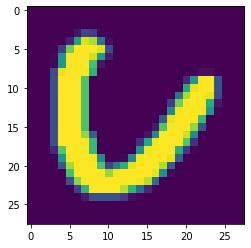

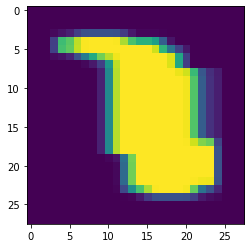

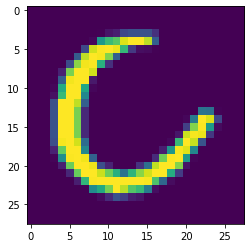

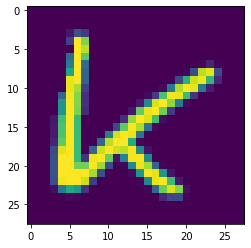

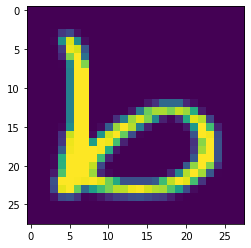

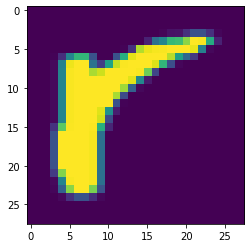

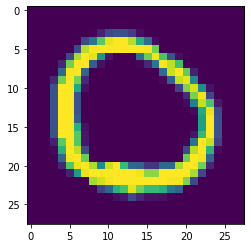

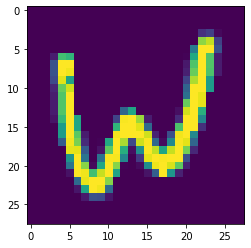

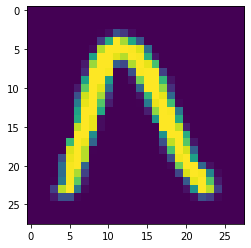

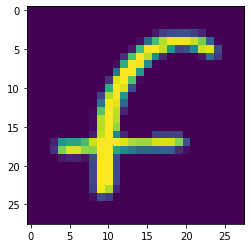

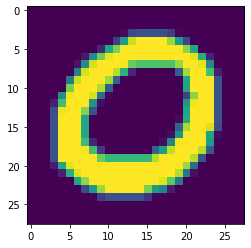

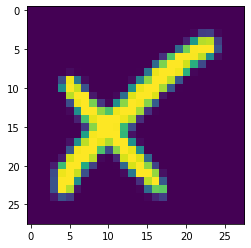

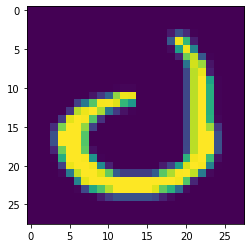

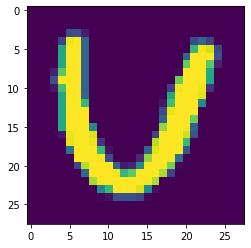

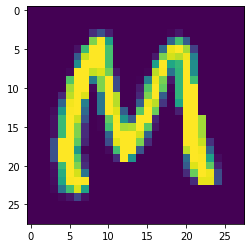

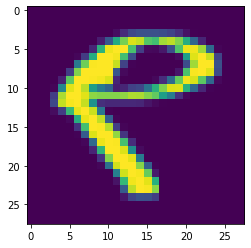

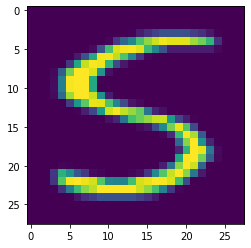

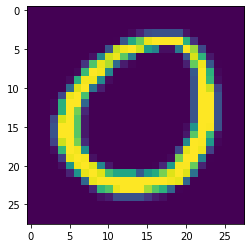

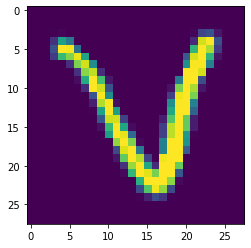

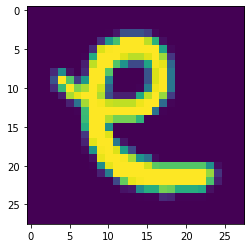

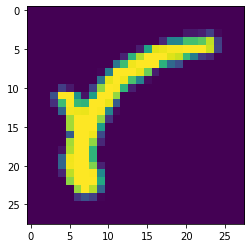

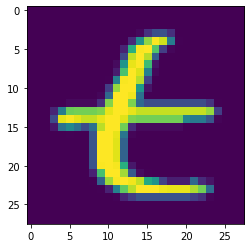

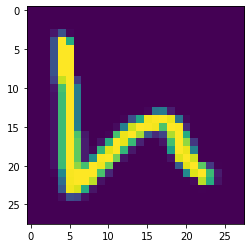

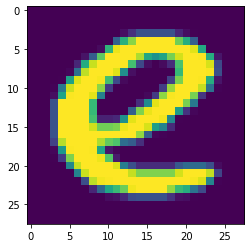

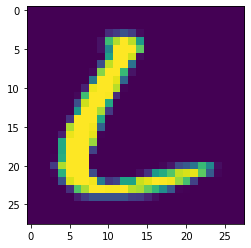

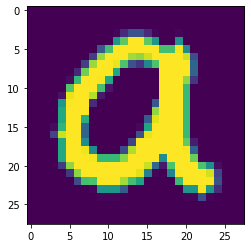

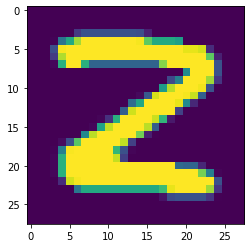

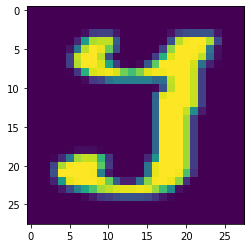

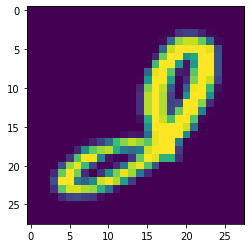

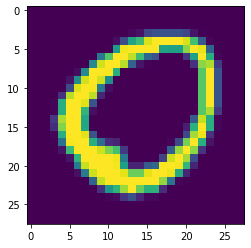

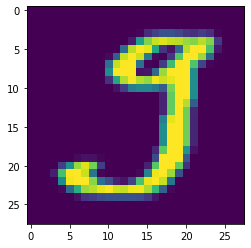

(132, 28, 28)
(132, 28, 28, 1)


In [37]:
#have each letter classifed and its classification added to a list then printed out, then have this list split appart for each word.
# Extract letters from page
import cv2
import time
start_time = time.time()
extract = Extract_Letters()

letters_in_doc_CNN = []

letters = extract.extractFile("/content/Handwriting documents/hand write 4-1.png", "defualt")#add default mode

for letter in letters:#for each letter in the file
  letter = cv2.copyMakeBorder( letter, 5, 5, 5, 5, cv2.BORDER_CONSTANT)#add boarder so it looks like training data (5 on each side)
  #resize
  letter = resize(letter, (28, 28))#resize back
  letters_in_doc_CNN.append(letter)
  #-----------------------------------show the image
  # from PIL import Image
  # import numpy as np
  # from matplotlib import pyplot as plt
  # plt.imshow(letter, interpolation='nearest')
  # plt.show()
  #-----------------------------------
  
letters_in_doc_CNN= np.array(letters_in_doc_CNN , dtype=np.float32)#converts to numpy array
print(letters_in_doc_CNN.shape)

letters_in_doc_CNN = np.expand_dims(letters_in_doc_CNN,-1).astype(np.float32) 
print(letters_in_doc_CNN.shape)

In [38]:
#to classfy an array of images
import tensorflow as tf
with tf.Session() as sess:
    saver.restore(sess, "./CNN_basic.ckpt") # or better, use save_path
    X_new_scaled =  letters_in_doc_CNN#feed img array
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

print("Predicted classes:", y_pred)

INFO:tensorflow:Restoring parameters from ./CNN_basic.ckpt
Predicted classes: [ 0  1  2  3  4  5  6  7  0 20 10 11 12 13 16 17 33 17 18 19 20 21 22 23 24 25  0  1  2  3  4  5  6  7  8  9 10 11 12 13 26 17 16 17 18 19 20 21 22 23 24 25 26  8 28 29  7 31 32 33 34 35 10  7  4 16 20  6  2 10 32 17 26 22 13  5 14 23  9 20 12 17 31 26 21  4 17 19  7  4 11  0 25 24  3 26  6 11  7  4 16 20 17 32 10  1 17 26 22 13  5 26 23  3 20 12 18 31 26 21  4 17 19  7  4 11  0 25 24 24 14  6]


In [39]:
alphabet = "abcdefghijklmnopqrstuvwxyz"
numbers = "0123456789"
quick_brown_fox = "thequickbrownfoxjumpsoverthelazydog"
real_string = alphabet + alphabet + numbers + quick_brown_fox + quick_brown_fox

real_list = list(real_string)#split into a list

print(real_list)
print(y_pred)

predicted_list = y_pred
predicted_list = [find_label_string(ele, label_tuples) for ele in predicted_list] 

from sklearn import metrics
print("Neural net accuracy Score with test data (my handwriting): ")
metrics.accuracy_score(real_list, predicted_list, normalize=True)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 't', 'h', 'e', 'q', 'u', 'i', 'c', 'k', 'b', 'r', 'o', 'w', 'n', 'f', 'o', 'x', 'j', 'u', 'm', 'p', 's', 'o', 'v', 'e', 'r', 't', 'h', 'e', 'l', 'a', 'z', 'y', 'd', 'o', 'g', 't', 'h', 'e', 'q', 'u', 'i', 'c', 'k', 'b', 'r', 'o', 'w', 'n', 'f', 'o', 'x', 'j', 'u', 'm', 'p', 's', 'o', 'v', 'e', 'r', 't', 'h', 'e', 'l', 'a', 'z', 'y', 'd', 'o', 'g']
[ 0  1  2  3  4  5  6  7  0 20 10 11 12 13 16 17 33 17 18 19 20 21 22 23 24 25  0  1  2  3  4  5  6  7  8  9 10 11 12 13 26 17 16 17 18 19 20 21 22 23 24 25 26  8 28 29  7 31 32 33 34 35 10  7  4 16 20  6  2 10 32 17 26 22 13  5 14 23  9 20 12 17 31 26 21  4 17 19  7  4 11  0 25 24  3 26  6 11  7  4 16 20 17 32 10  1 17 26 22 13  5 26 23

0.7954545454545454

In [40]:
doc_CNN = ""
#print (time.time() - start_time, "seconds" )
letters = 1

alphabet = 26
numbers = 10
lazy_dog = 35

for ele in y_pred:#num should be the same
  if(letters == alphabet+1 or letters == (alphabet*2)+1 or letters == (alphabet*2)+1+numbers or letters == (alphabet*2)+1+numbers+ lazy_dog):#letters (lower+uppercase), then numbers, then sets of the quick brown fox
    doc_CNN+="\n"
  doc_CNN+=(find_label_string(ele, label_tuples))#gets just the predicted character and adds to the string
  letters += 1

print("CNN - basic - page interpretation: ")
print(doc_CNN)

CNN - basic - page interpretation: 
abcdefghauklmnqr7rstuvwxyz
abcdefghijklmn0rqrstuvwxyz
0i23h56789
khequgck6r0wnfoxjumr50verthelazyd0g
lhequr6kbr0wnf0xdums50verthelazyyog


#CNN - More advanced - Define graph - (SGD -> adam), Dropout (0.8), smaller kernel and strides, more epocs, more layers -> additional conv2d, pool, dropout set

In [84]:
#could shuffle before split but it looks fairly random
#split data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(union_data, union_labels, random_state=0, test_size=0.20)
#------------------------------- shuffle data and labels before validation split
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)

X_train = X_train[indices]
y_train = y_train[indices]
#-------------------------------

In [85]:
n_epochs = 35
batch_size = 100

In [86]:
n_conv1 = 32
n_conv2 = 64
n_hidden1 = 512
n_outputs = 36

X_train = np.expand_dims(X_train,-1).astype(np.float32) / 255.0
X_test = np.expand_dims(X_test,-1).astype(np.float32) / 255.0

y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, 28, 28, 1), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

keep_prob = 1 - tf.placeholder(tf.float32) #for dropout

In [87]:
#could add more layers in here to improve accuracy
with tf.name_scope("dnn"):
    conv1 = tf.layers.conv2d(X, 
                             n_conv1, 
                             kernel_size = (3,3), 
                             strides=(2,2), ##
                             name="conv1", 
                             activation=tf.nn.relu)
    
    pool1 = tf.layers.max_pooling2d(conv1, 
                                    pool_size=(4,4), 
                                    strides=(4,4))
    
    drop_out = tf.nn.dropout(pool1, keep_prob)

    #another conv2d, pool then dropout:
    conv2 = tf.layers.conv2d(drop_out, 
                             n_conv2, 
                             kernel_size = (3,3), 
                             strides=(2,2),##
                             name="conv2", 
                             )
    
    pool2 = tf.layers.max_pooling2d(conv1, 
                                    pool_size=(4,4), 
                                    strides=(4,4))
    
    drop_out2 = tf.nn.dropout(pool2, keep_prob)
    

    flatten = tf.layers.flatten(drop_out2)

    fc1 = tf.layers.dense(flatten,
                          n_hidden1, 
                          name="fc1",
                          activation=tf.nn.relu)
    
    logits = tf.layers.dense(fc1, 
                             n_outputs, 
                             name="outputs")

In [88]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [100]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.compat.v1.train.AdamOptimizer(
    learning_rate=0.01,
    name='Adam')
    
    training_op = optimizer.minimize(loss)

In [90]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [91]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

# Train

In [92]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, keep_prob : 0.8}) #feed dropout here (keep_prob/rate), good rate is 0.5-0.8
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch, keep_prob : 1.0}) #dont do on validation
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid, keep_prob : 1.0})
        print("Epoch:", epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./CNN_more_adv.ckpt")

Epoch: 0 Batch accuracy: 0.83 Validation accuracy: 0.8156
Epoch: 1 Batch accuracy: 0.84 Validation accuracy: 0.8286
Epoch: 2 Batch accuracy: 0.76 Validation accuracy: 0.8292
Epoch: 3 Batch accuracy: 0.89 Validation accuracy: 0.841
Epoch: 4 Batch accuracy: 0.85 Validation accuracy: 0.8468
Epoch: 5 Batch accuracy: 0.91 Validation accuracy: 0.8396
Epoch: 6 Batch accuracy: 0.89 Validation accuracy: 0.8352
Epoch: 7 Batch accuracy: 0.87 Validation accuracy: 0.8462
Epoch: 8 Batch accuracy: 0.85 Validation accuracy: 0.844
Epoch: 9 Batch accuracy: 0.88 Validation accuracy: 0.8416
Epoch: 10 Batch accuracy: 0.9 Validation accuracy: 0.8362
Epoch: 11 Batch accuracy: 0.88 Validation accuracy: 0.8308
Epoch: 12 Batch accuracy: 0.89 Validation accuracy: 0.8324
Epoch: 13 Batch accuracy: 0.88 Validation accuracy: 0.8388
Epoch: 14 Batch accuracy: 0.83 Validation accuracy: 0.8328
Epoch: 15 Batch accuracy: 0.91 Validation accuracy: 0.8414
Epoch: 16 Batch accuracy: 0.91 Validation accuracy: 0.8472
Epoch: 17 

# Accuracy on its own test data

In [93]:
with tf.Session() as sess:
    saver.restore(sess, "./CNN_more_adv.ckpt") # or better, use save_path
    #------------shuffle before split - to get a better look at the results
    indices = np.arange(X_test.shape[0])
    np.random.shuffle(indices)

    X_test = X_test[indices]
    y_test = y_test[indices]
    #---------------------------------
    X_new_scaled = X_test
    Z = logits.eval(feed_dict={X: X_new_scaled, keep_prob : 1.0})
    y_pred = np.argmax(Z, axis=1)
    
print("Predicted classes:", y_pred[:20])
print("Actual classes:   ", y_test[:20])

from sklearn import metrics
print("CNN accuracy Score with test data (emnist): ")
metrics.accuracy_score(y_test, y_pred, normalize=True)

INFO:tensorflow:Restoring parameters from ./CNN_more_adv.ckpt
Predicted classes: [15 18 31 26 18 24 34 32  4 28 17  3 21 14 20 20 27  2 26  1]
Actual classes:    [15 18 31 26 18 21 34 32  4 28 17  3 21 14 20 20 27  2 14  1]
CNN accuracy Score with test data (emnist): 


0.8382745726495726

INFO:tensorflow:Restoring parameters from ./CNN_more_adv.ckpt
[[ 837   18    1    2    7    1    3    7    1    0    0    1    4    5    7    0   33    1    0    1    5    2    6    3    0    3    1    0   13    7    0    0    0    0    3    1    0]
 [   6  846    0    2    0    1    3   17    0    0    2    3    0    1    1    1    1    1    1    1    0    0    1    0    0    1    1    0    0    2    0    2   46    0   38    0    0]
 [   6    1  877    1   39    1    0    0    3    0    1    3    0    0    3    0    3    0    4    0    2    1    0    0    0    1    0    2    0    0    0    0    5    0    0    0    0]
 [   3    6    0  902    0    0    0    2    0    2    2    2    1    2   28    4    4    0    0    1    2    0    0    0    0    0   18    0    2    2    0    0    0    0    1    0    0]
 [   2    2   27    0  907    0    0    0    0    0    0    2    0    0    3    0    1    5    0    2    1    0    0    0    0    2    1    0    1    1    0    0    5    0    8    0    0

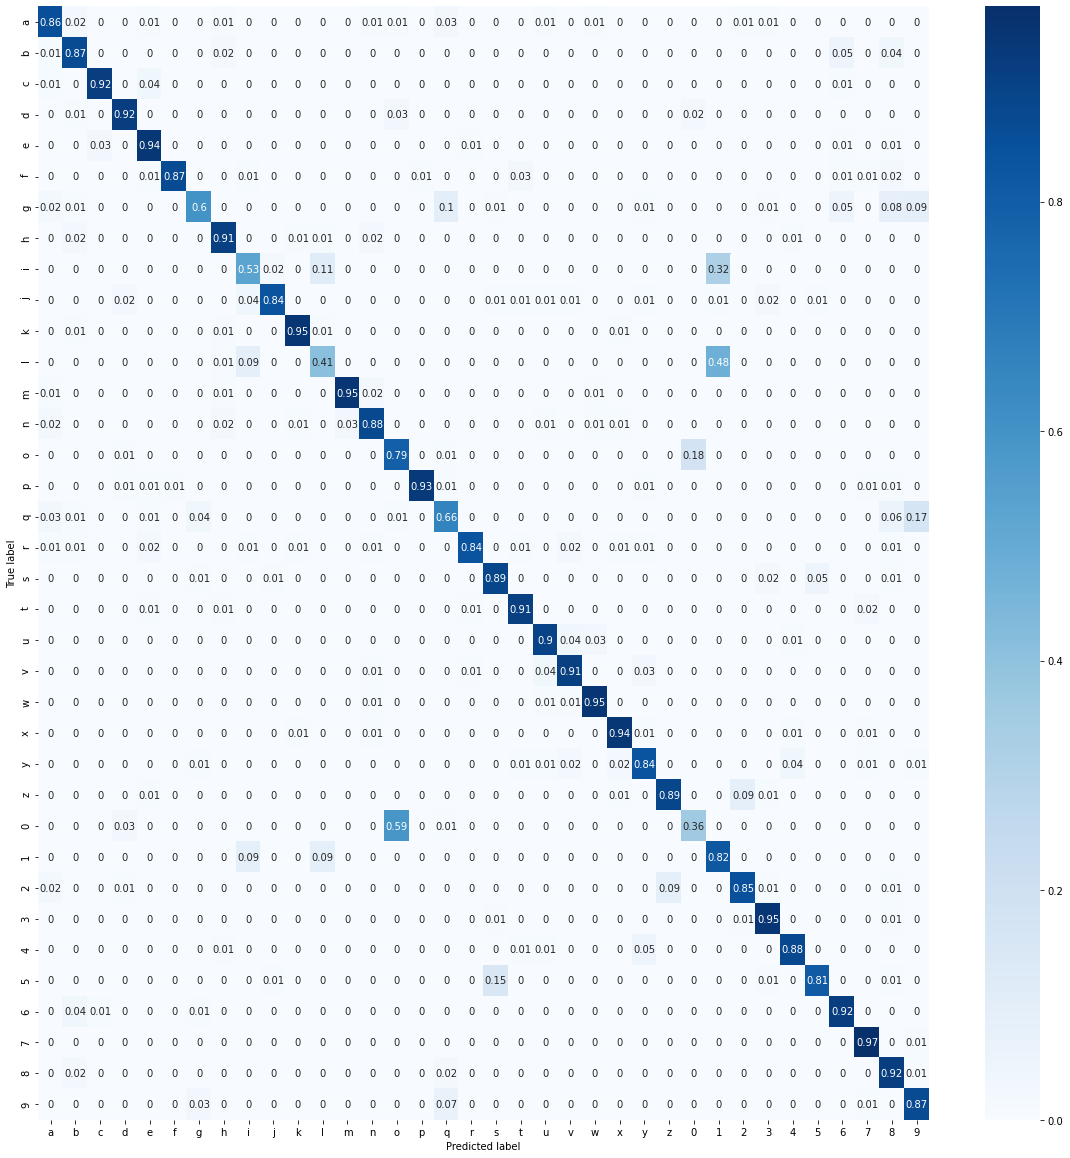

In [94]:
import sys
import numpy
#for the numpy array output version
numpy.set_printoptions(threshold=sys.maxsize)#to display all rows
numpy.set_printoptions(linewidth =sys.maxsize)#makes it so it the rows dont wrap around

with tf.Session() as sess:
    saver.restore(sess, "./CNN_more_adv.ckpt")
    confusion = tf.confusion_matrix(labels=y_test, predictions=y_pred, num_classes=26+9+1+1)#for its own data (split from the training dataset)
    numpy_con_mat = confusion.eval(session=sess)
    print(numpy_con_mat)
    
numpy_con_mat = numpy_con_mat[:36,:36]
con_mat_norm = np.around(numpy_con_mat.astype('float') / numpy_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)#get relative frequency for prediction labels

#new tick lables
labels_correct = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
import pandas as pd
con_mat_df = pd.DataFrame(con_mat_norm, index = labels_correct, columns = labels_correct)

from matplotlib import pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(16, 16))

sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

# CNN - Adv - Test against doc 

In [95]:
#create int class to string:
label_tuples = []

string = 'abcdefghijklmnopqrstuvwxyz0123456789'#classes in order
split_list = [char for char in string]

print(split_list)

value = 0
for character in split_list:
  label_tuples.append((character, value))
  value+=1

print(label_tuples)

def find_label_string(int_label, label_tuples):
  for ele in label_tuples:
    if(ele[1]== int_label):
      return ele[0]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
[('a', 0), ('b', 1), ('c', 2), ('d', 3), ('e', 4), ('f', 5), ('g', 6), ('h', 7), ('i', 8), ('j', 9), ('k', 10), ('l', 11), ('m', 12), ('n', 13), ('o', 14), ('p', 15), ('q', 16), ('r', 17), ('s', 18), ('t', 19), ('u', 20), ('v', 21), ('w', 22), ('x', 23), ('y', 24), ('z', 25), ('0', 26), ('1', 27), ('2', 28), ('3', 29), ('4', 30), ('5', 31), ('6', 32), ('7', 33), ('8', 34), ('9', 35)]


Extracting characters...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


/content/Handwriting documents/hand write 4-1.png


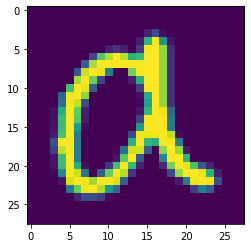

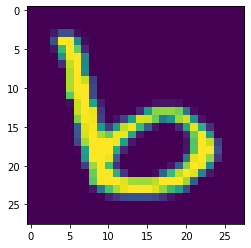

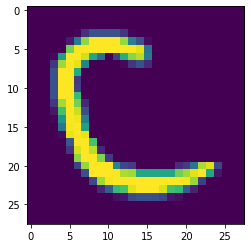

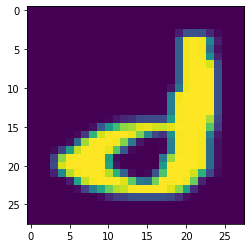

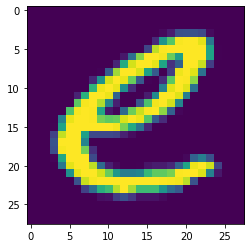

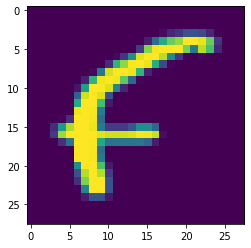

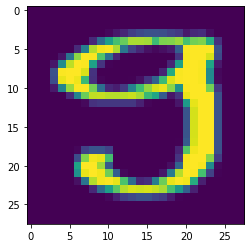

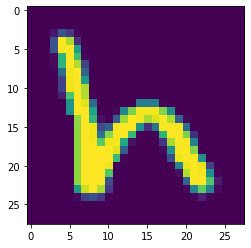

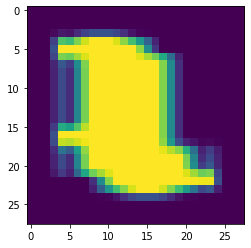

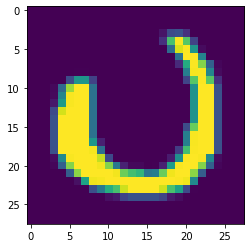

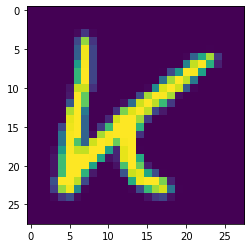

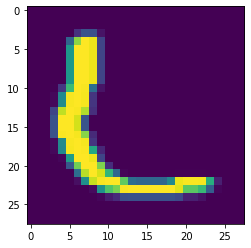

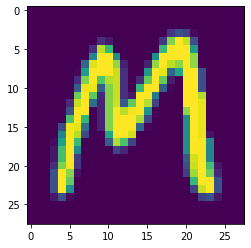

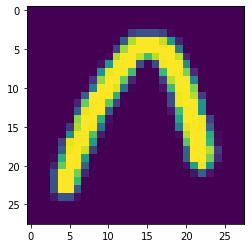

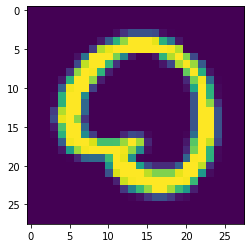

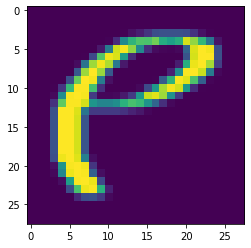

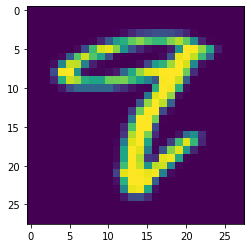

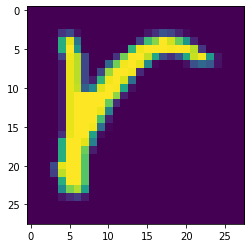

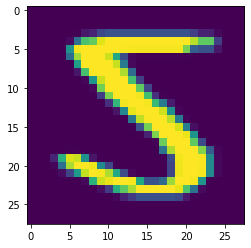

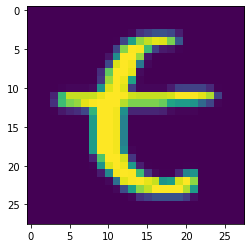

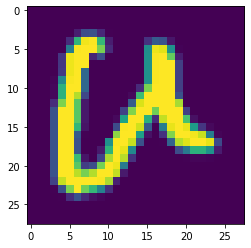

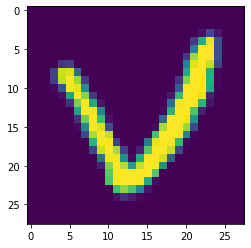

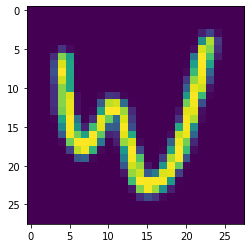

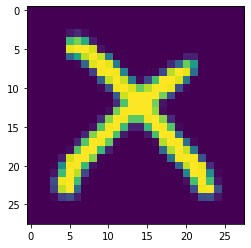

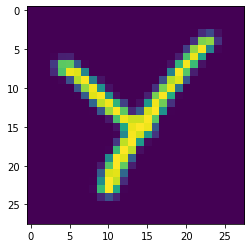

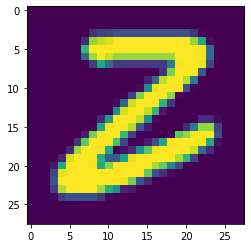

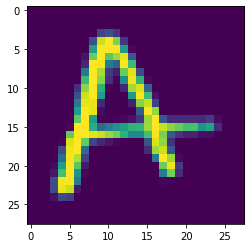

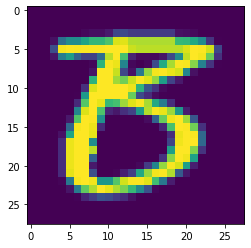

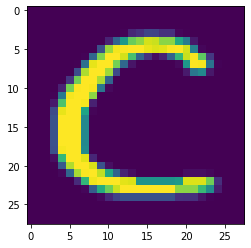

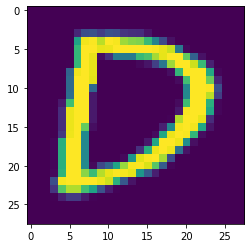

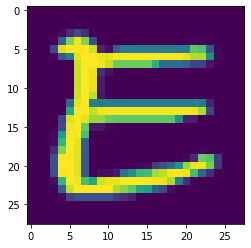

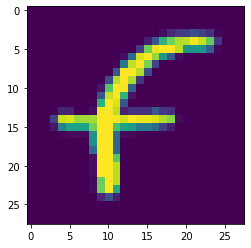

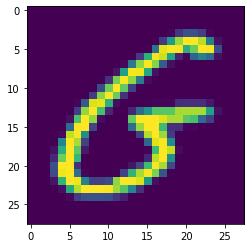

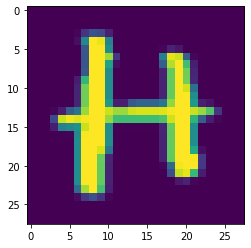

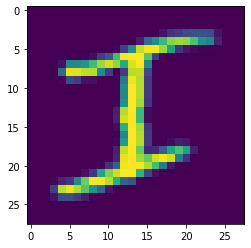

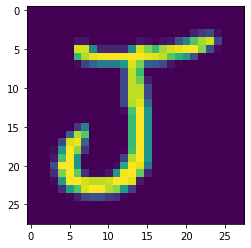

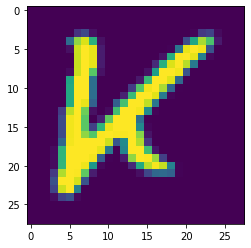

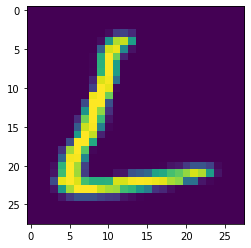

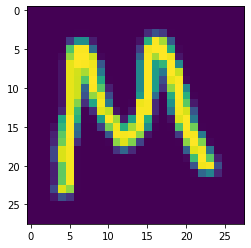

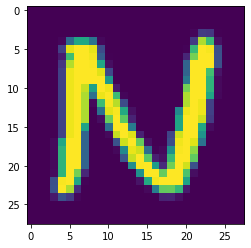

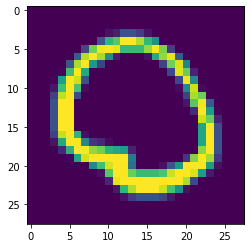

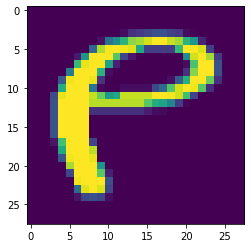

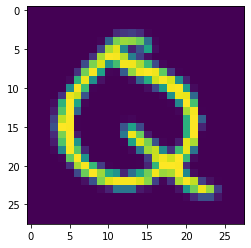

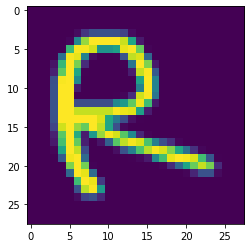

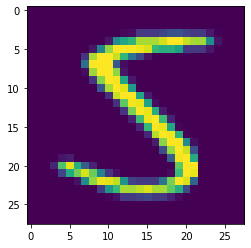

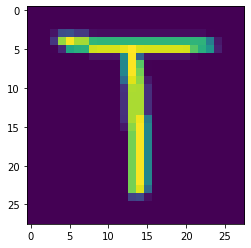

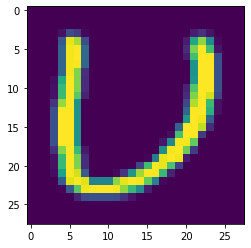

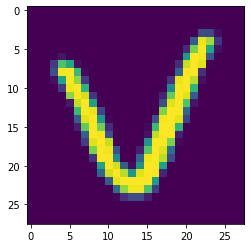

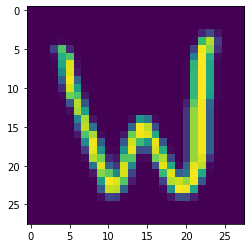

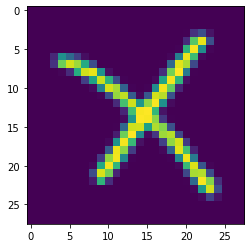

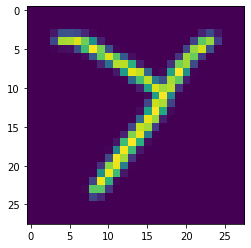

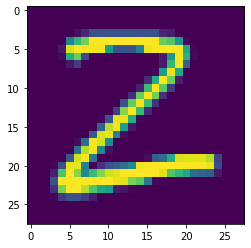

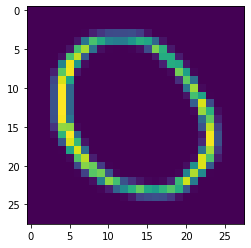

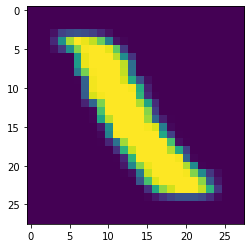

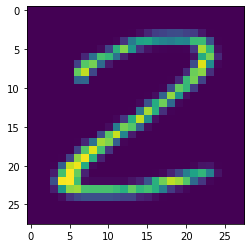

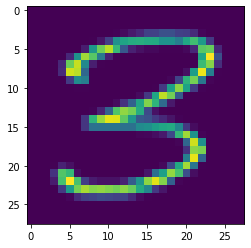

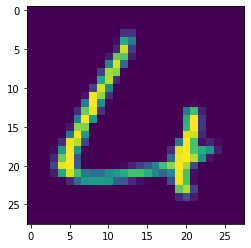

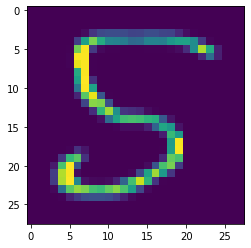

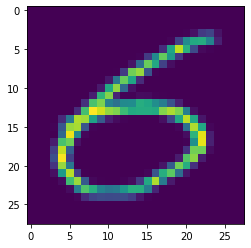

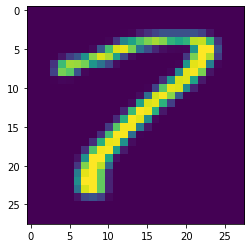

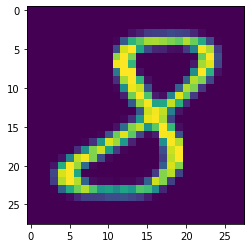

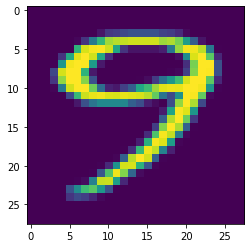

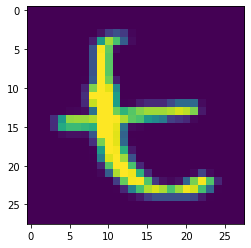

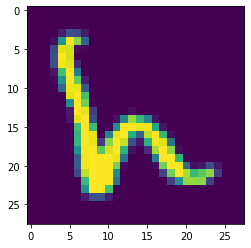

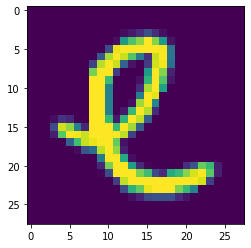

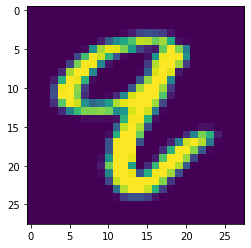

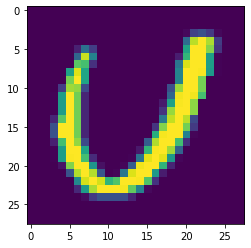

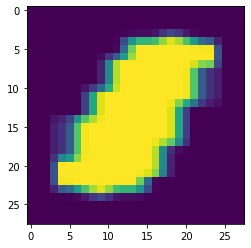

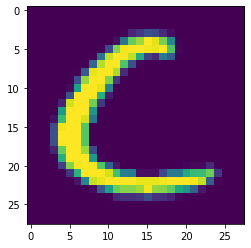

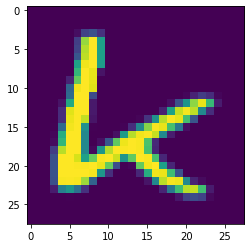

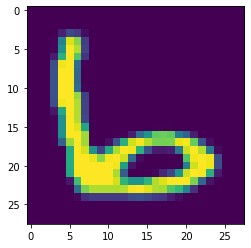

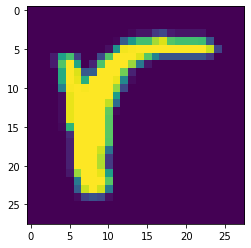

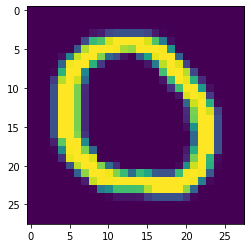

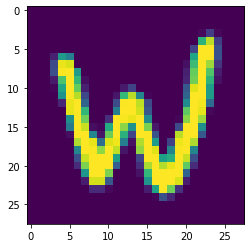

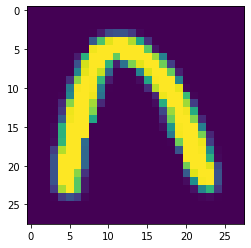

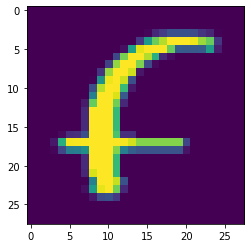

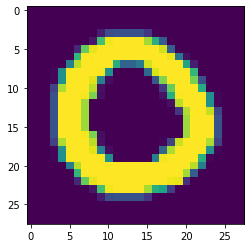

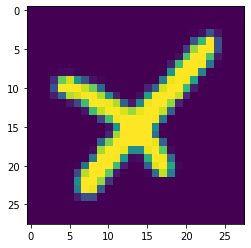

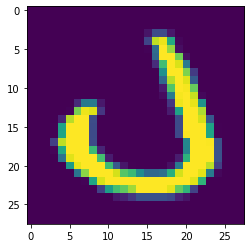

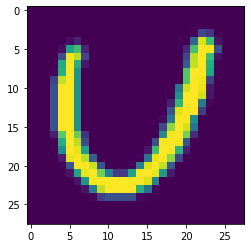

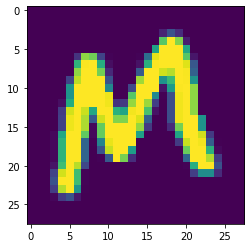

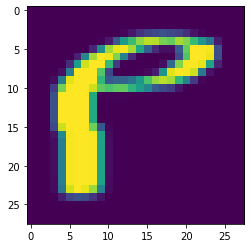

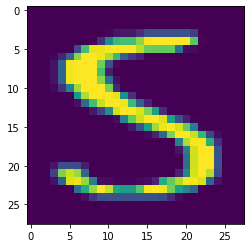

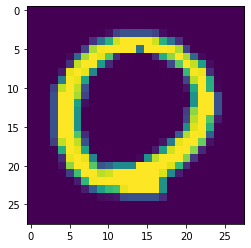

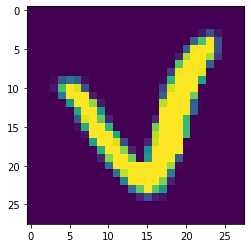

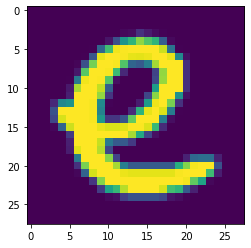

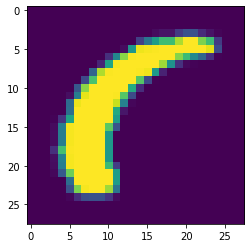

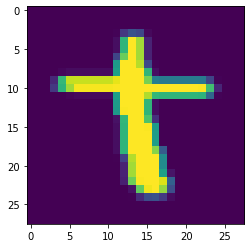

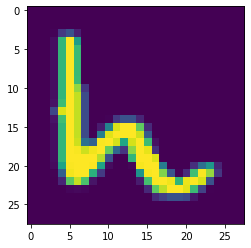

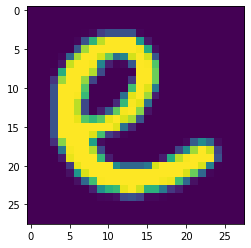

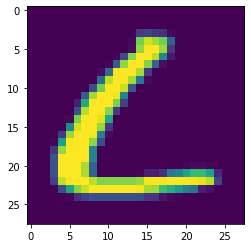

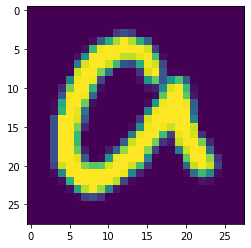

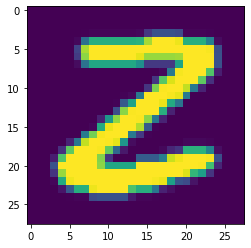

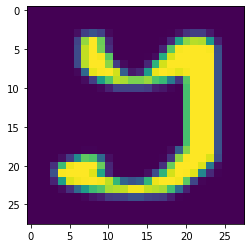

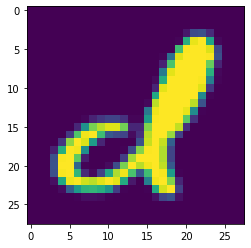

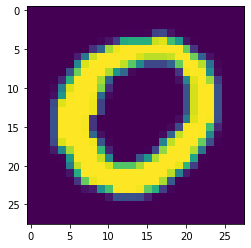

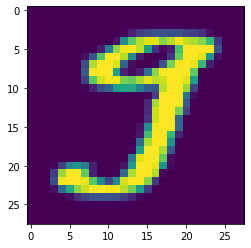

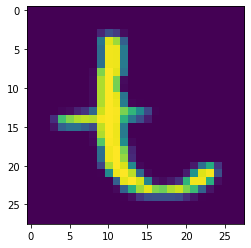

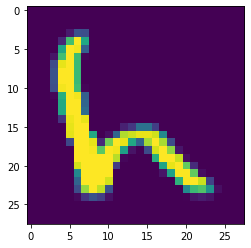

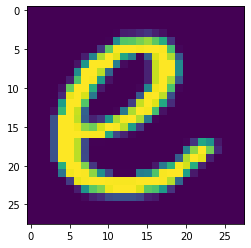

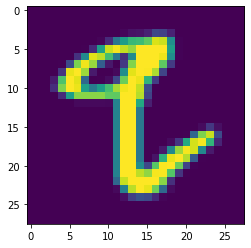

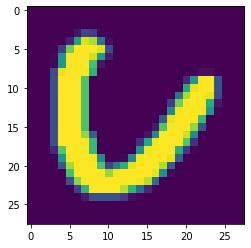

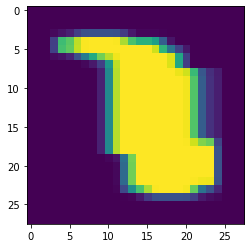

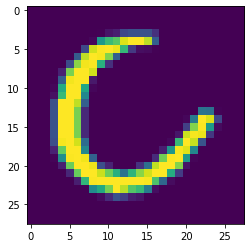

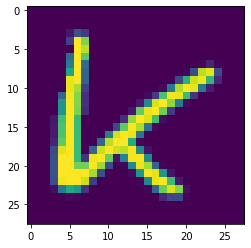

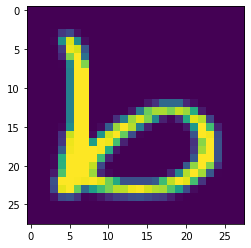

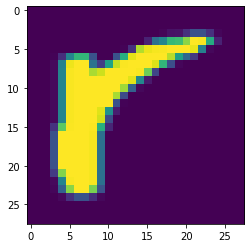

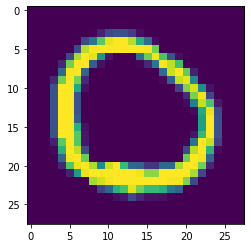

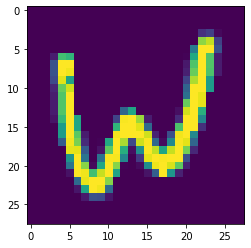

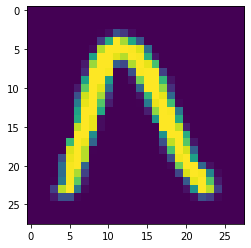

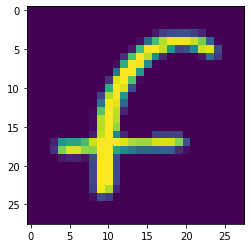

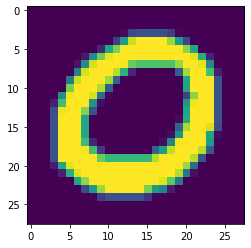

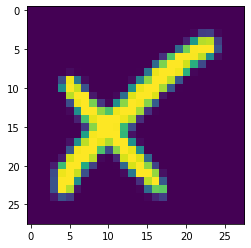

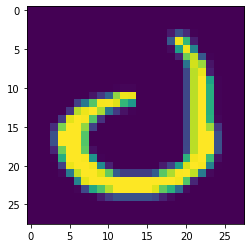

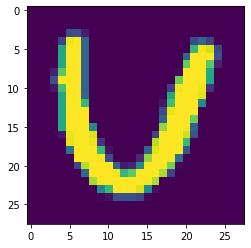

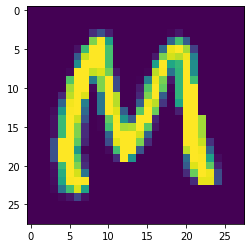

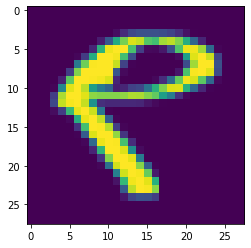

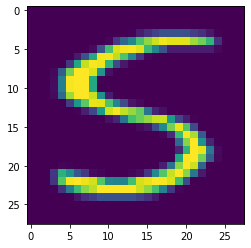

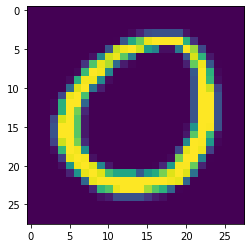

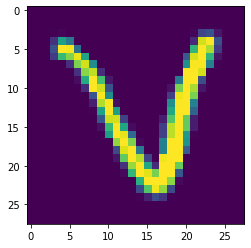

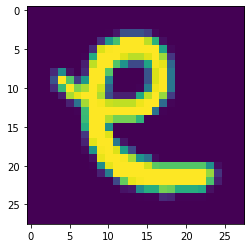

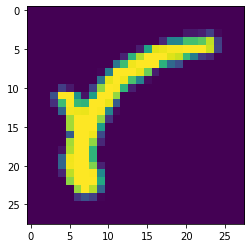

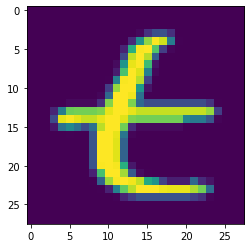

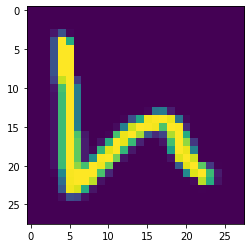

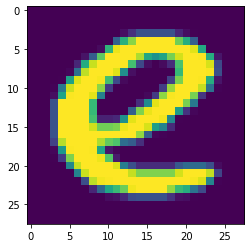

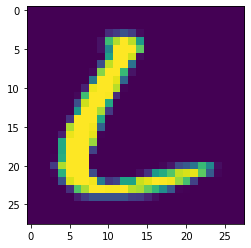

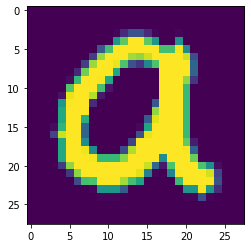

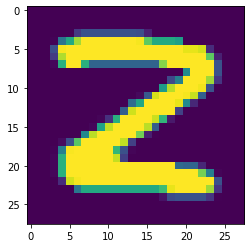

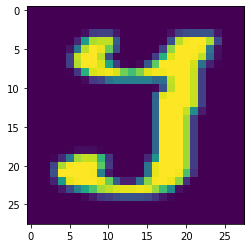

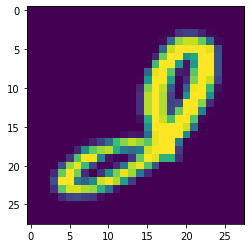

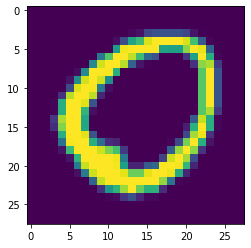

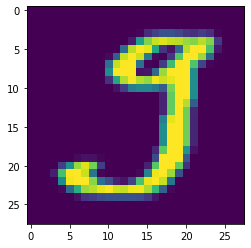

(132, 28, 28)
(132, 28, 28, 1)


In [96]:
#have each letter classifed and its classification added to a list then printed out, then have this list split appart for each word.
# Extract letters from page
import cv2
import time
start_time = time.time()
extract = Extract_Letters()

letters_in_doc_CNN = []

letters = extract.extractFile("/content/Handwriting documents/hand write 4-1.png", "defualt")#add default mode

for letter in letters:#for each letter in the file
  letter = cv2.copyMakeBorder( letter, 5, 5, 5, 5, cv2.BORDER_CONSTANT)#add boarder so it looks like training data (5 on each side)
  #resize
  letter = resize(letter, (28, 28))#resize back
  letters_in_doc_CNN.append(letter)
  #-----------------------------------show the image
  # from PIL import Image
  # import numpy as np
  # from matplotlib import pyplot as plt
  # plt.imshow(letter, interpolation='nearest')
  # plt.show()
  #-----------------------------------
  
letters_in_doc_CNN= np.array(letters_in_doc_CNN , dtype=np.float32)#converts to numpy array
print(letters_in_doc_CNN.shape)

letters_in_doc_CNN = np.expand_dims(letters_in_doc_CNN,-1).astype(np.float32) 
print(letters_in_doc_CNN.shape)

In [97]:
#to classfy an array of images
import tensorflow as tf
with tf.Session() as sess:
    saver.restore(sess, "./CNN_more_adv.ckpt") # or better, use save_path
    X_new_scaled =  letters_in_doc_CNN#feed img array
    Z = logits.eval(feed_dict={X: X_new_scaled, keep_prob : 1.0})
    y_pred = np.argmax(Z, axis=1)

print("Predicted classes:", y_pred)

INFO:tensorflow:Restoring parameters from ./CNN_more_adv.ckpt
Predicted classes: [ 0  1  2  3  4  5  6  7  0 20 10 11 12 13 16  4 16  5  9  5 20 21 22 23 24 25  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14  4 16 17 18 19 20 21 22 23 24 25 14 23 28 29 22 31 31 33 34 35 19  7  4 16 20 14  2 20  1 17 14 22 12  5 14 23 30 20 12 34 18 14 21  4 31 19  7  4 11 16 25 24  3 14  6 19  7  4 16 20 28  2 10  1 17 14 22  0  5 14 23  3 21 12  4 18 14 21  4 17 19  7  4 11  0 25 24  3 26  6]


In [98]:
alphabet = "abcdefghijklmnopqrstuvwxyz"
numbers = "0123456789"
quick_brown_fox = "thequickbrownfoxjumpsoverthelazydog"
real_string = alphabet + alphabet + numbers + quick_brown_fox + quick_brown_fox

real_list = list(real_string)#split into a list

print(real_list)
print(y_pred)

predicted_list = y_pred
predicted_list = [find_label_string(ele, label_tuples) for ele in predicted_list] 

from sklearn import metrics
print("Neural net accuracy Score with test data (my handwriting): ")
metrics.accuracy_score(real_list, predicted_list, normalize=True)#77.2%

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 't', 'h', 'e', 'q', 'u', 'i', 'c', 'k', 'b', 'r', 'o', 'w', 'n', 'f', 'o', 'x', 'j', 'u', 'm', 'p', 's', 'o', 'v', 'e', 'r', 't', 'h', 'e', 'l', 'a', 'z', 'y', 'd', 'o', 'g', 't', 'h', 'e', 'q', 'u', 'i', 'c', 'k', 'b', 'r', 'o', 'w', 'n', 'f', 'o', 'x', 'j', 'u', 'm', 'p', 's', 'o', 'v', 'e', 'r', 't', 'h', 'e', 'l', 'a', 'z', 'y', 'd', 'o', 'g']
[ 0  1  2  3  4  5  6  7  0 20 10 11 12 13 16  4 16  5  9  5 20 21 22 23 24 25  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14  4 16 17 18 19 20 21 22 23 24 25 14 23 28 29 22 31 31 33 34 35 19  7  4 16 20 14  2 20  1 17 14 22 12  5 14 23 30 20 12 34 18 14 21  4 31 19  7  4 11 16 25 24  3 14  6 19  7  4 16 20 28  2 10  1 17 14 22  0  5 14 23

0.8106060606060606

In [99]:
doc_CNN = ""
#print (time.time() - start_time, "seconds" )
letters = 1

alphabet = 26
numbers = 10
lazy_dog = 35

for ele in y_pred:#num should be the same
  if(letters == alphabet+1 or letters == (alphabet*2)+1 or letters == (alphabet*2)+1+numbers or letters == (alphabet*2)+1+numbers+ lazy_dog):#letters (lower+uppercase), then numbers, then sets of the quick brown fox
    doc_CNN+="\n"
  doc_CNN+=(find_label_string(ele, label_tuples))#gets just the predicted character and adds to the string
  letters += 1

print("CNN - adv - page interpretation: ")
print(doc_CNN)

CNN - adv - page interpretation: 
abcdefghauklmnqeqfjfuvwxyz
abcdefghijklmnoeqrstuvwxyz
ox23w55789
thequocubrowmfox4um8sove5thelqzydog
thequ2ckbrowafoxdvmesoverthelazyd0g
